# Lead Scoring Case Study

__Our Goals of the Case Study:__

1) To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

2) To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

## Step1: Understanding the Data

In [455]:
# Importing all required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [463]:
## Import dataset

leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [128]:
## Check the shape of data and datatypes of column

leads_data.shape

(9240, 37)

In [6]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## Describe the Data

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### From above description output , we can see there are missing values in our dataset 

## Step2:  Data Preparation  

In [11]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
### check the percentage of null records in columns

round(leads_data.isnull().sum()/len(leads_data),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### We can see some of the columns are having very high percentage of missing values. Lets the drop the columns which contains missing value higher than 30%

In [464]:
leads_data = leads_data.drop(columns=['Tags','Lead Quality',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [20]:
# Check null percentages across columns after removing the above columns

round(leads_data.isnull().sum()/len(leads_data),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [21]:
## Check the value counts for Country column

leads_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [25]:
# We can see India occurs most of the time, Lets check the percentage of ocurrance

round(len(leads_data[leads_data['Country'] == 'India'])/len(leads_data['Country']),2)*100

70.0

In [465]:
## We can see India occurs 70% of times And we got 27% of null records as well in country column
# We can drop this column

leads_data = leads_data.drop(columns='Country')

In [32]:
## Check the value counts for 'How did you hear about X Education' column

leads_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [33]:
round(len(leads_data[leads_data['How did you hear about X Education'] == 'Select'])/len(leads_data['How did you hear about X Education']),2)*100

55.00000000000001

In [466]:
## We can see Select occurs 55% of times And we got 24% of null records as well in "How did you hear about X Education" column
# We can drop this column

leads_data = leads_data.drop(columns='How did you hear about X Education')

In [35]:
## Check the value counts for 'Lead Profile' column

leads_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [36]:
round(len(leads_data[leads_data['Lead Profile'] == 'Select'])/len(leads_data['Lead Profile']),2)*100

45.0

In [467]:
## We can see Select occurs 45% of times And we got 29% of null records as well in "Lead Profile" column
# We can drop this column

leads_data = leads_data.drop(columns='Lead Profile')

In [39]:
## Check the value counts for 'What is your current occupation' column

leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

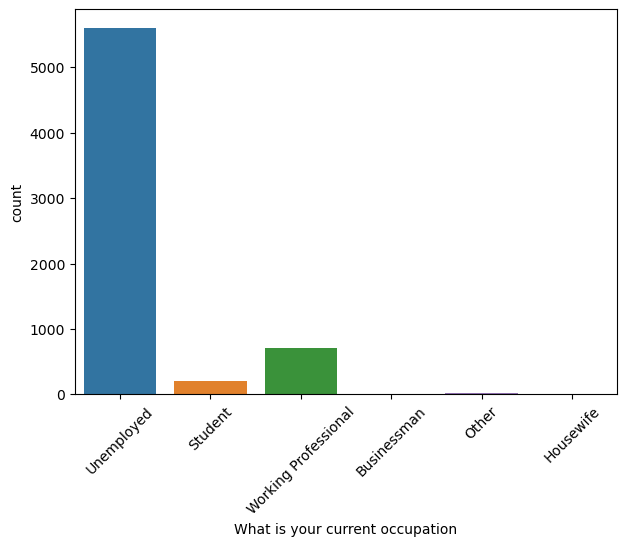

In [43]:
# Lets visualize 'What is your current occupation' column using countplot

plt.figure(figsize=(7,5))
sns.countplot(leads_data['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [468]:
## We can see above that 'Unemployed' occured most of the time in 'What is your current occupation' column
# Lets impute 29% missing record with 'Unemployeed' value

leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [134]:
# Check the value counts for the column 'What matters most to you in choosing a course' 

leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
round(100*len(leads_data[leads_data['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leads_data['What matters most to you in choosing a course']),2)

70.65

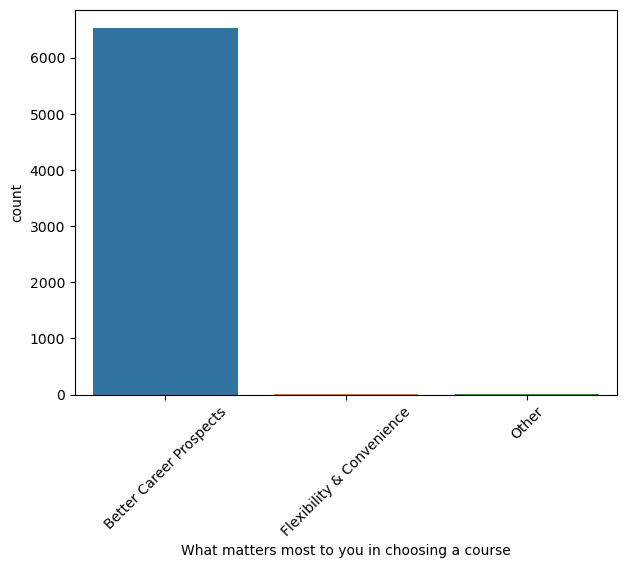

In [53]:
# Lets visualize 'What matters most to you in choosing a course' column

plt.figure(figsize=(7,5))
sns.countplot(leads_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [469]:
## We can see Better Career Prospects occurs 70.65% of times And we got 29% of null records as well in "What matters most to you in choosing a course" column
# We can drop this column

leads_data = leads_data.drop(columns='What matters most to you in choosing a course')

In [56]:
# Check the value counts for the column 'Specialization' 


leads_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [470]:
round(leads_data['Specialization'].isnull().sum()/len(leads_data['Specialization']),2)*100

16.0

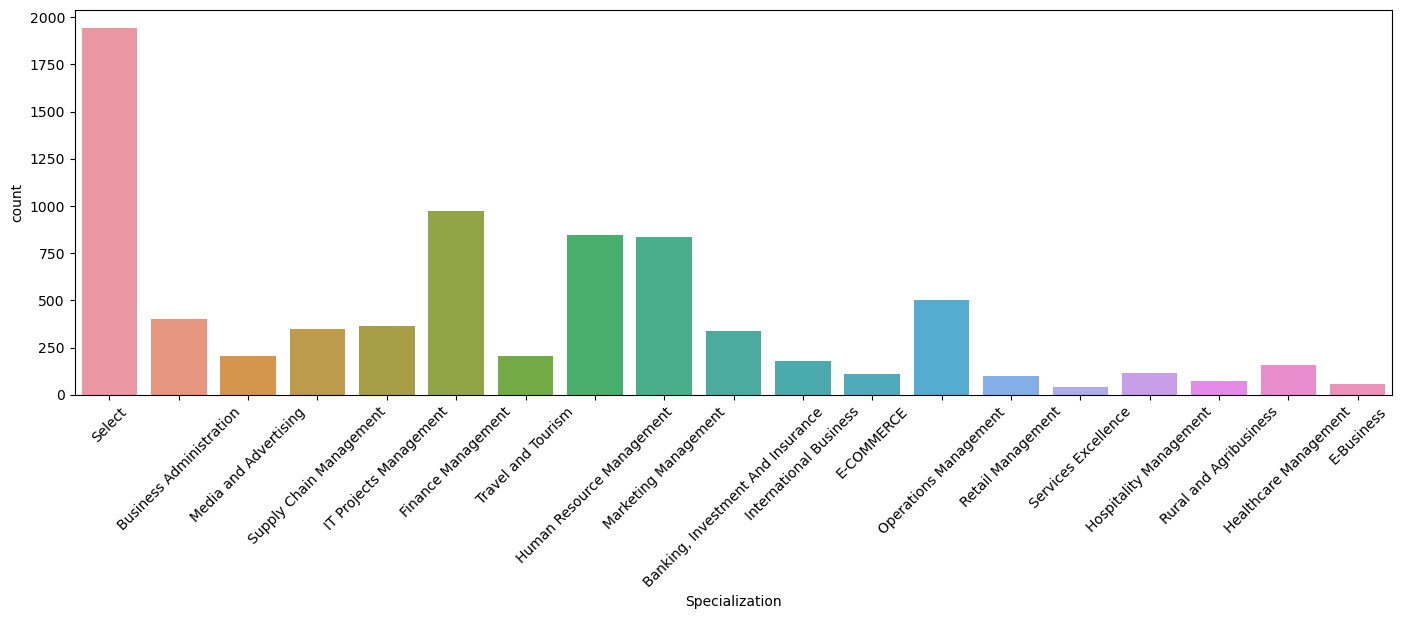

In [61]:
# Lets visualize 'What matters most to you in choosing a course' column

plt.figure(figsize=(17,5))
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation=45)
plt.show()

#### The number of null values present in the column 'Specialization ' is quite small we can simply drop the rows.

In [471]:
leads_data = leads_data[~pd.isnull(leads_data['Specialization'])]

In [63]:
# Finding the null percentages of columns after removing the above columns

round(leads_data.isnull().sum()/len(leads_data),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 2.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        2.0
Last Activity                               1.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

#### From the above list we are left with few columns with very minimal null values, Lets drop these row all together. 

In [472]:
leads_data.dropna(inplace=True)

In [138]:
# Finding the null percentages of columns after removing the null Rows

round(leads_data.isnull().sum()/len(leads_data),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [70]:
## Lets check the retained rows percentage after clearing the null rows.

print((len(leads_data.index)/9424)*100)
print(leads_data.shape)

80.95288624787777
(7629, 27)


#### We have 81% of the rows and 27 columns retained with us.

## Step3: Exploratory Data Analysis

#### Let's Perform Univariate and Bivariate Analysis

###  Lead Origin

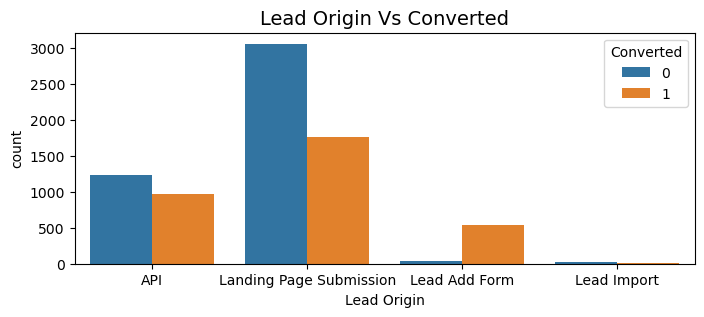

In [100]:
## Lets use countplot

plt.figure(figsize=(8,3))
sns.countplot(data=leads_data, x='Lead Origin', hue = "Converted")
plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.show()

#### Insights :

 1. API and Landing Page Submission is having low rate on conversion.
 2. Lead Add Form is having higher rate of conversion.
 3. Lead Import counts are very less.

### Lead Source 

In [85]:
# Check the value counts for the column Lead Source

leads_data['Lead Source'].value_counts()

Google               2514
Direct Traffic       2463
Organic Search       1029
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  4
Click2call              4
bing                    3
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [473]:
## We can see above that Google appears two times, Lets replace google with Google
# since Google has major chunk of data

leads_data['Lead Source'] = leads_data['Lead Source'].replace('google', 'Google')

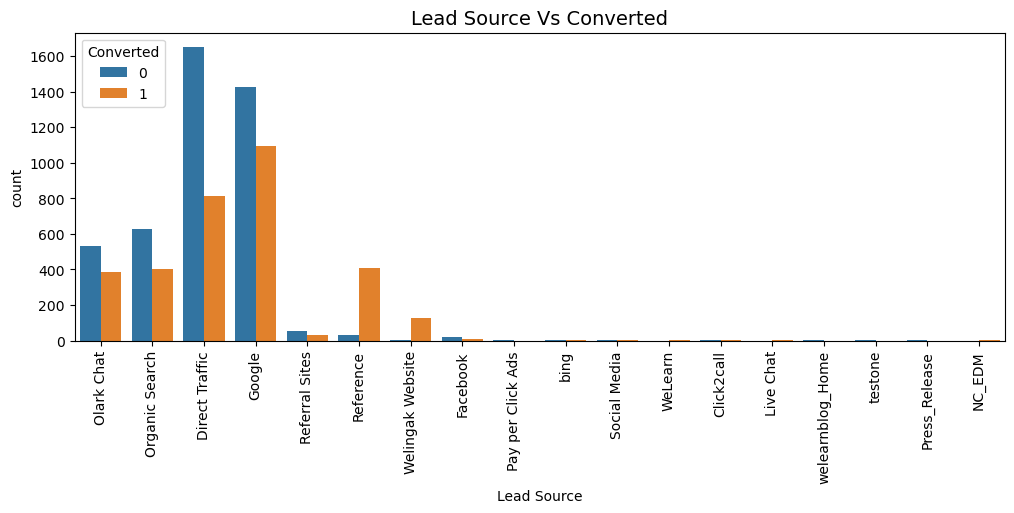

In [293]:
## Lets use countplot

plt.figure(figsize=(12,4))
sns.countplot(data = leads_data, x = "Lead Source", hue = "Converted")
plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

In [474]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.

leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


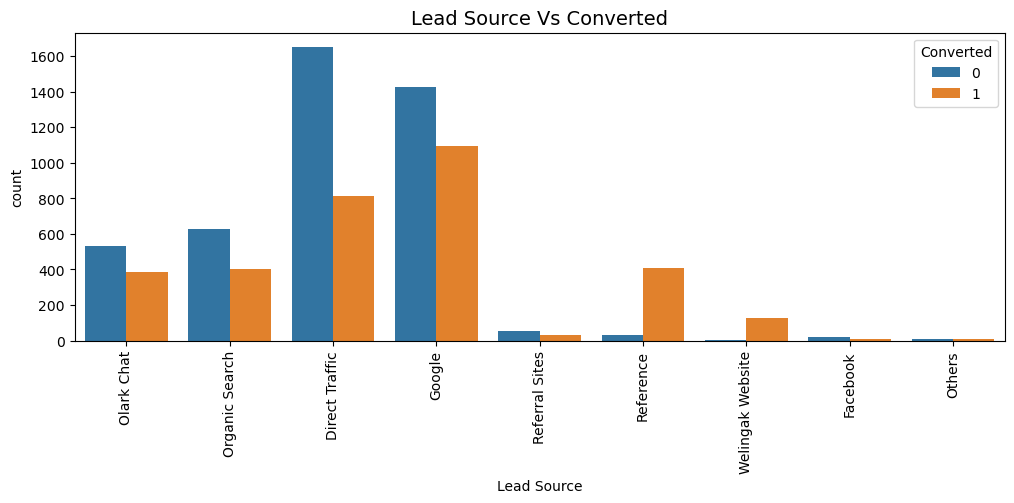

In [295]:
##  Visualizing again

plt.figure(figsize=(12,4))
sns.countplot(data = leads_data, x = "Lead Source", hue = "Converted")
plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

#### Insights :

1. Direct Traffic and Google are having Maximum Number of leads but less number of conversion.
2. Reference and Welingak Website is having higher side of conversion rate.

### Do Not Email

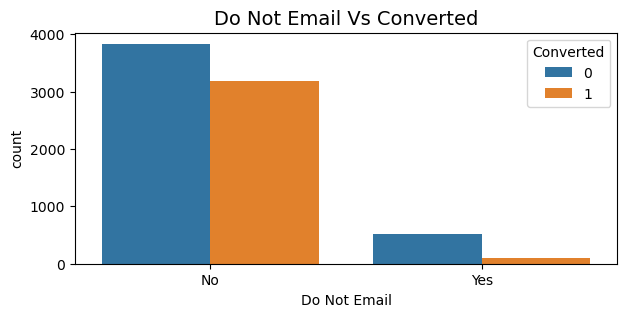

In [102]:
## Lets use countplot

plt.figure(figsize=(7,3))
sns.countplot(data = leads_data, x = "Do Not Email", hue = "Converted")
plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion.

### Do not Call

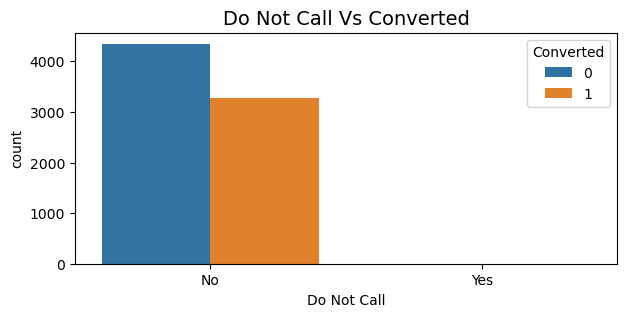

In [103]:
## Lets use countplot

plt.figure(figsize=(7,3))
sns.countplot(data = leads_data, x = "Do Not Call", hue = "Converted")
plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No so we can not conclude any result with conversion.

###  Converted 

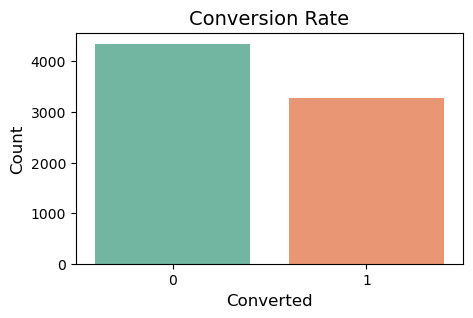

In [597]:
# Conversion Rate 

plt.figure(figsize=(5,3))
sns.countplot(x="Converted", data=leads_data, palette="Set2")
plt.title('Conversion Rate', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

In [592]:
## Converted is our target variable, Let's findout the conversion rate from this column

conversion = (round(sum(leads_data['Converted'])/len(leads_data['Converted']),2)*100)
print("Lead Conversion Ratio:-", conversion,'%')

Lead Conversion Ratio:- 43.0 %


### TotalVisits

In [476]:
## Let's check outliers at 25%,50%,75%,90%,95% and above

leads_data['TotalVisits'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    7629.000000
mean        3.812164
std         5.092689
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

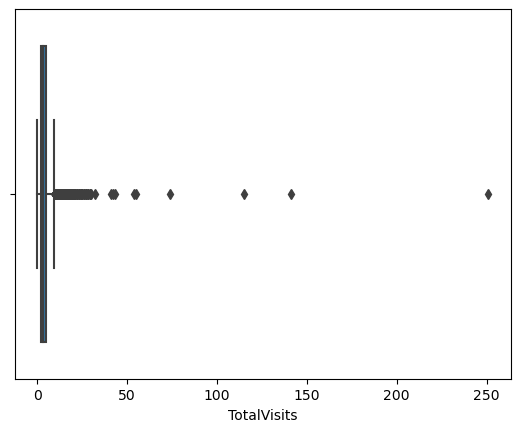

In [142]:
## We can see the outliers clearly in above outcome, Lets Visualize boxplot

sns.boxplot(leads_data['TotalVisits'])
plt.show()

In [477]:
# Lets remove value after 95% for TotalVisits.

selected_data = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= selected_data[0]] = selected_data[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= selected_data[1]] = selected_data[1]

In [144]:
leads_data['TotalVisits'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    7629.000000
mean        3.511994
std         2.751606
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64

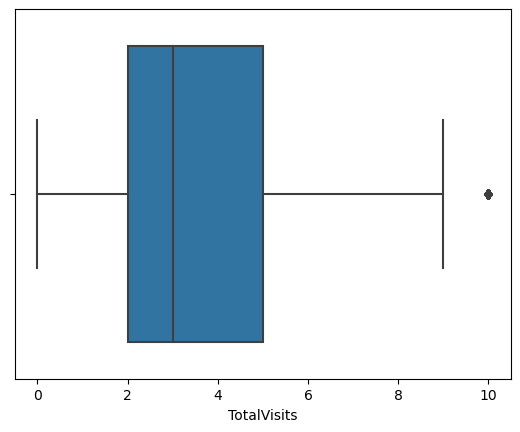

In [145]:
## We can see the outliers clearly in above outcome, Lets Visualize boxplot again

sns.boxplot(leads_data['TotalVisits'])
plt.show()

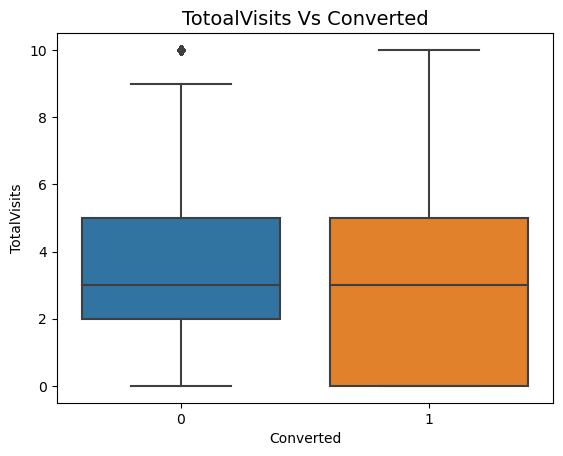

In [150]:
## Lets use boxplot to check TotalVisits conversion

sns.boxplot(data = leads_data, y = "TotalVisits", x = "Converted")
plt.title('TotoalVisits Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1.  We can clearly see in above boxplot that median is same for converted and not converted leads. We can not conclude anything from this outcome.

### Total Time Spent on Website

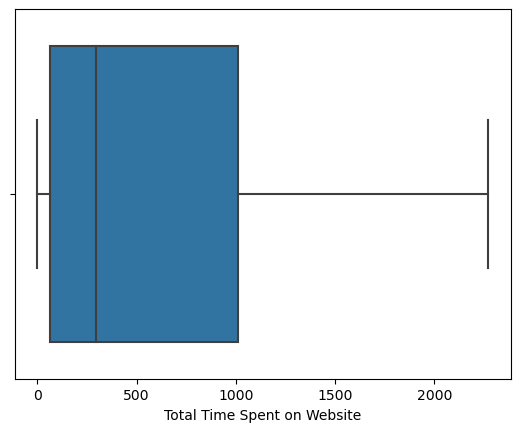

In [152]:
##  Lets Visualize Total Time Spent on Website column using boxplot 

sns.boxplot(leads_data['Total Time Spent on Website'])
plt.show()

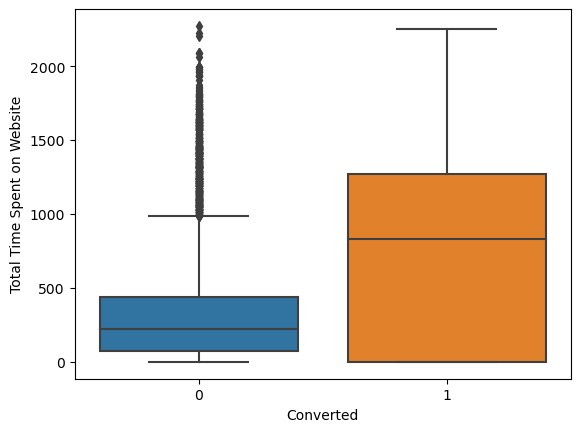

In [154]:
## Lets use boxplot to check Total Time Spent on Website conversion

sns.boxplot( data = leads_data, y = 'Total Time Spent on Website', x = 'Converted')
plt.show()

#### Insights :

1. We can clearly see leads have higher chances of conversion if they spend more time on website. 

### Page Views Per Visit 

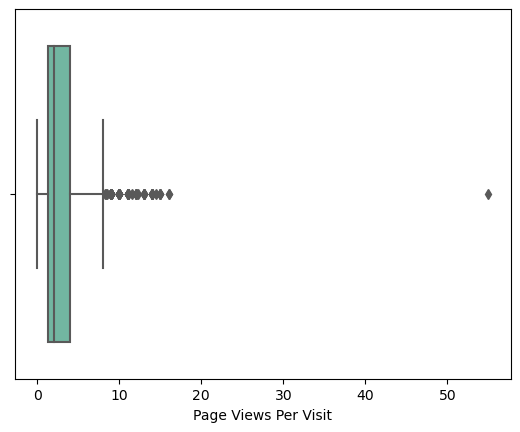

In [172]:
##  Lets Visualize Total Time Spent on Website column using boxplot 

sns.boxplot(leads_data['Page Views Per Visit'], palette='Set2')
plt.show()

In [478]:
## Let's check outliers at 25%,50%,75%,90%,95% and above

leads_data['Page Views Per Visit'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    7629.000000
mean        2.624260
std         2.153255
min         0.000000
25%         1.330000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### We can clearly see the outliers in ''Page Views Per Visit' column. Lets remove value after 95% for this column.

In [479]:
page_quantile = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= page_quantile[0]] = page_quantile[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= page_quantile[1]] = page_quantile[1]


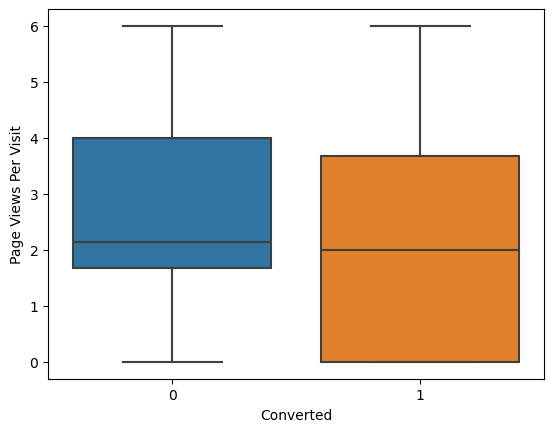

In [177]:
# Visualizing again and check the coversion 

sns.boxplot( data = leads_data, y = 'Page Views Per Visit', x = 'Converted')
plt.show()

#### Insights :

1. Median is alomst equal for converted and not converted leads. So we can not conclude any result from Page Views Per Visit records.

### Last Activity

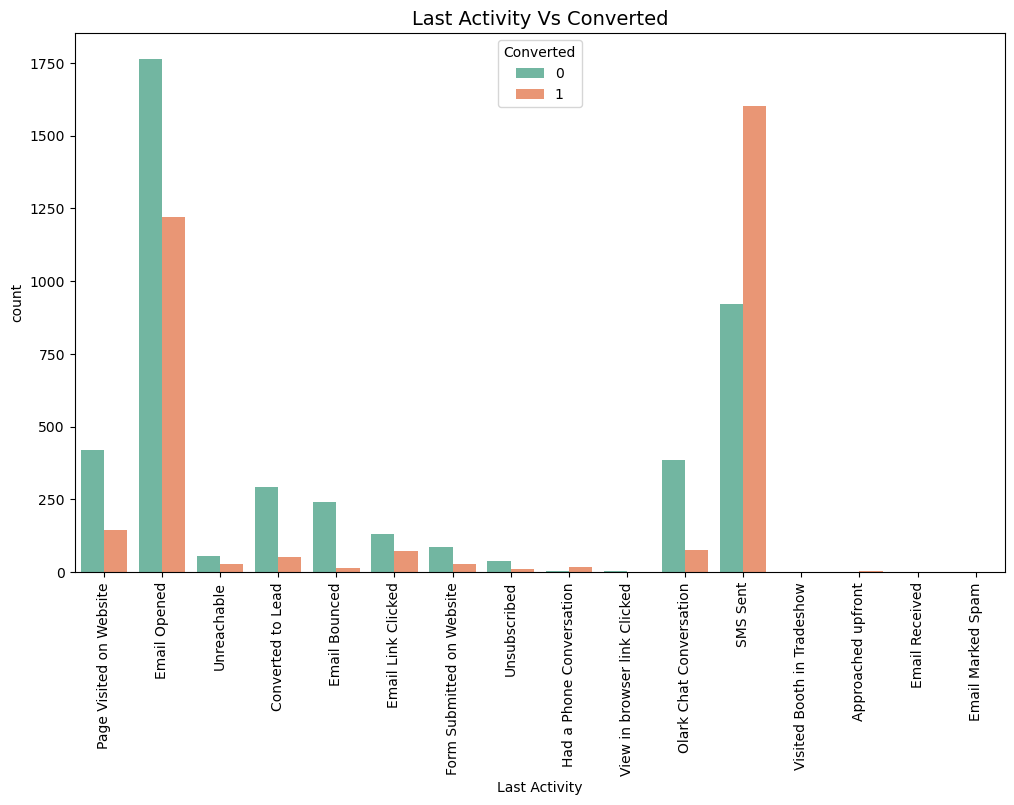

In [183]:
## Lets use countplot

plt.figure(figsize=(12,7))
sns.countplot(data = leads_data, x = "Last Activity", hue = "Converted", palette='Set2')
plt.xticks(rotation=90)
plt.title('Last Activity Vs Converted', fontsize = 14)
plt.show()

In [480]:
# Let's club the last activities to "Other_Activity" which are having less data.

leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

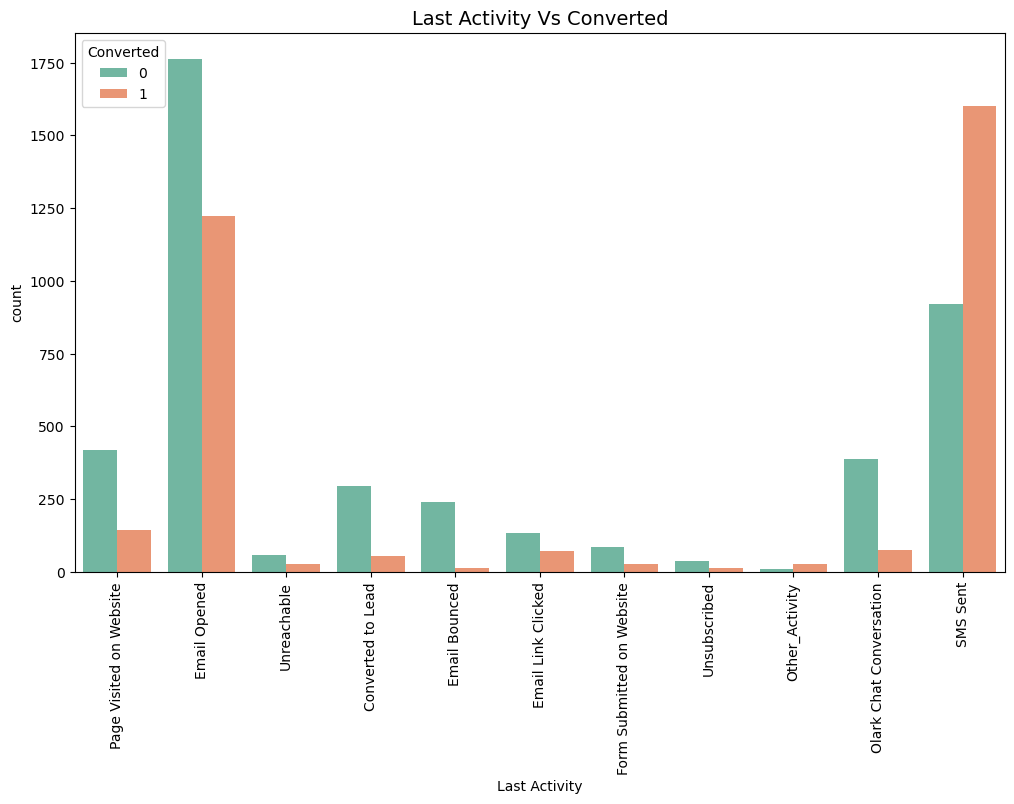

In [297]:
# Visualizing again

plt.figure(figsize=(12,7))
sns.countplot(data = leads_data, x = "Last Activity", hue = "Converted", palette='Set2')
plt.xticks(rotation=90)
plt.title('Last Activity Vs Converted', fontsize = 14)
plt.show()

####  Insights :

1. Email opened is the higher side of the leads last acitivty with less conversion.
2. SMS Sent last activity is having higher conversion rate.

### Specialization

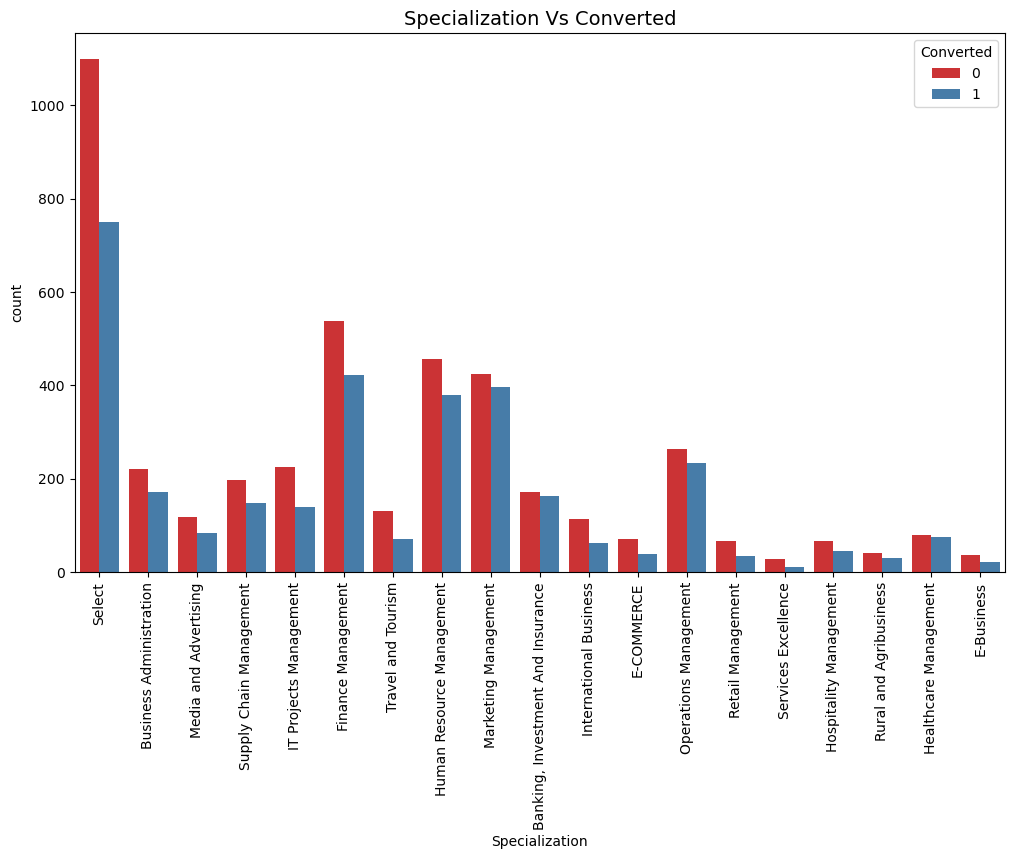

In [189]:
## Lets use countplot

plt.figure(figsize=(12,7))
sns.countplot(data = leads_data, x = "Specialization", hue = "Converted", palette='Set1')
plt.xticks(rotation=90)
plt.title('Specialization Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. None of the Specialization is having conversion, we should be focus on the high conversion rate.

### What is your current occupation 

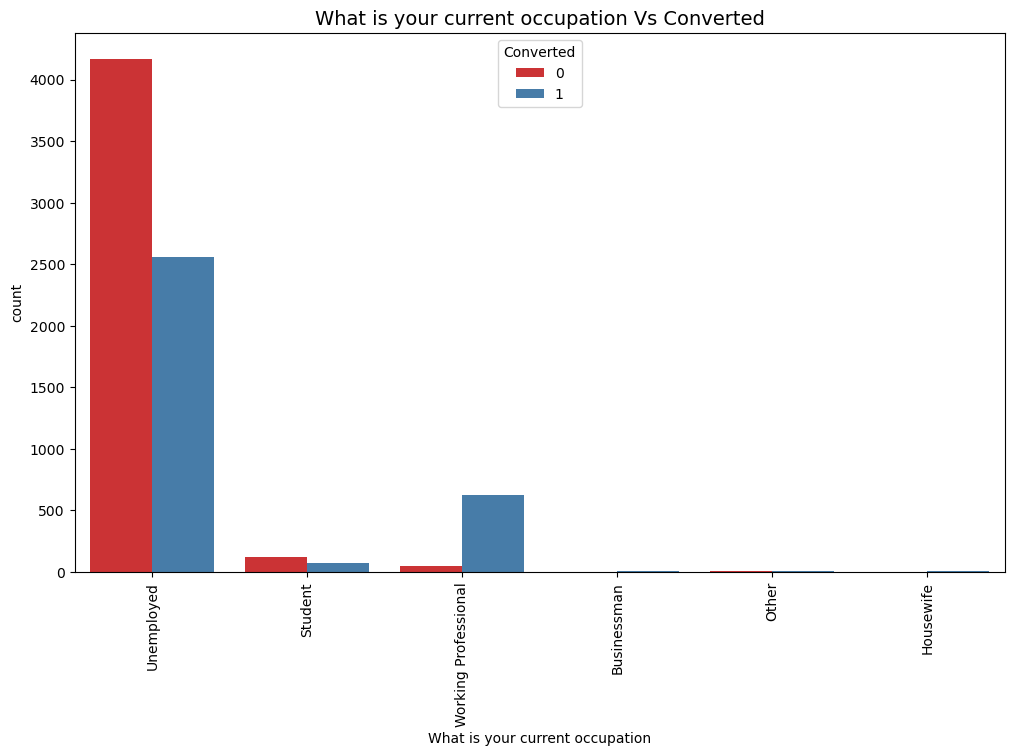

In [190]:
## Lets use countplot

plt.figure(figsize=(12,7))
sns.countplot(data = leads_data, x = "What is your current occupation", hue = "Converted", palette='Set1')
plt.xticks(rotation=90)
plt.title('What is your current occupation Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Unemployeed leads are higher in numbers but less in conversion.
2. Working Profession is having more chances of taking the course.

### Search 

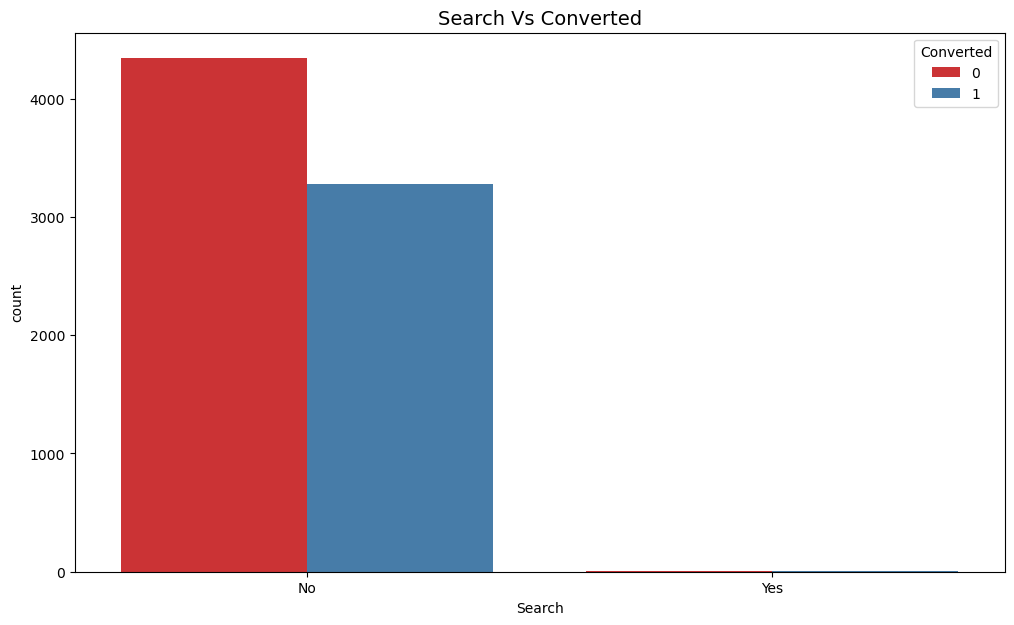

In [193]:
## Lets use countplot

plt.figure(figsize=(12,7))
sns.countplot(data = leads_data, x = "Search", hue = "Converted", palette='Set1')
plt.title('Search Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion.

### Magazine

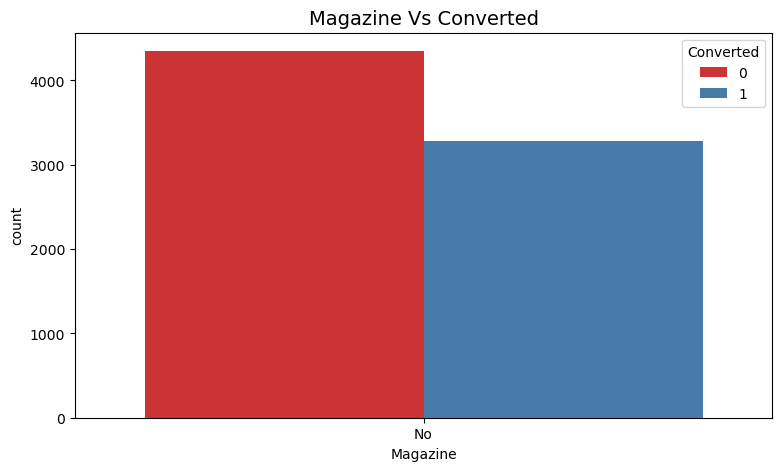

In [198]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Magazine", hue = "Converted", palette='Set1')
plt.title('Magazine Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion.

###  Newspaper Article

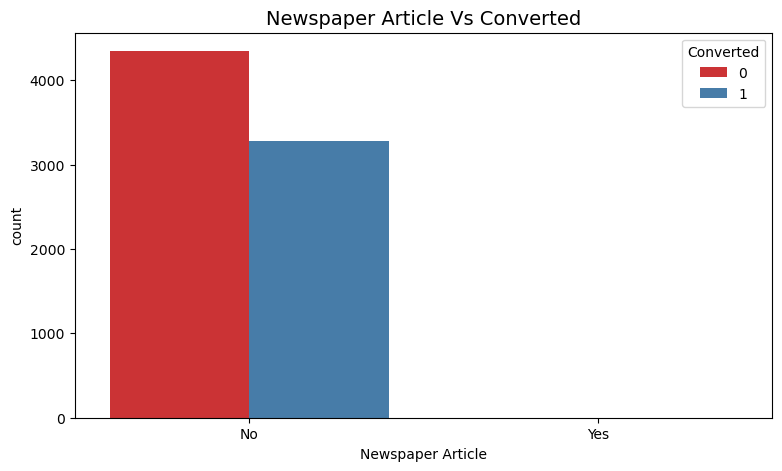

In [199]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Newspaper Article", hue = "Converted", palette='Set1')
plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion.

###  X Education Forums

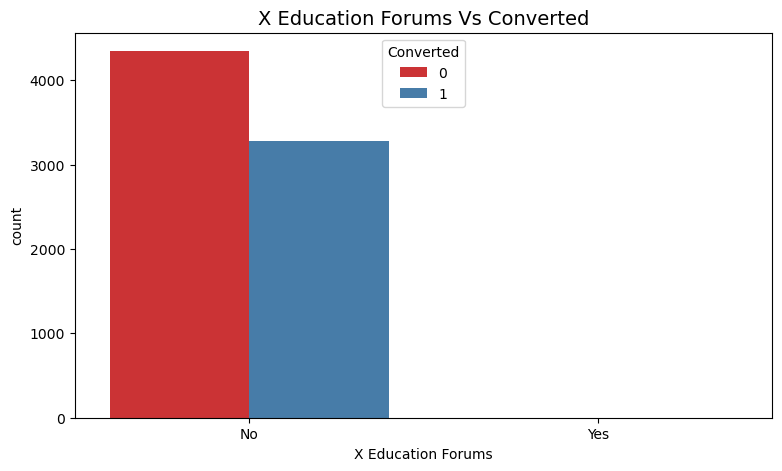

In [200]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "X Education Forums", hue = "Converted", palette='Set1')
plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion.

### Newspaper 

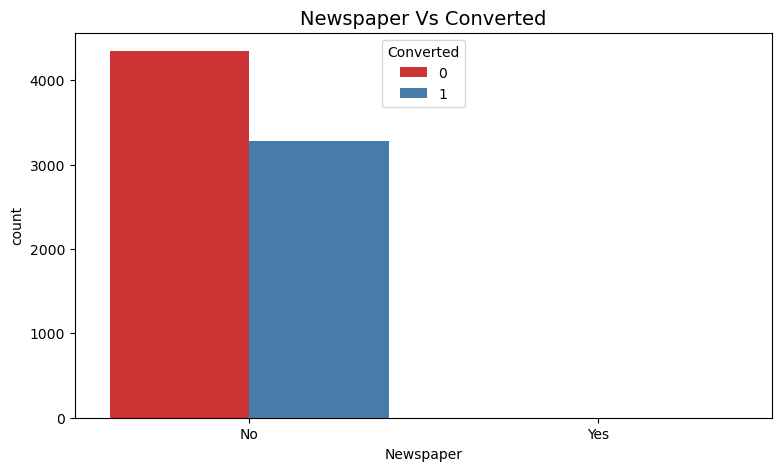

In [202]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Newspaper", hue = "Converted", palette='Set1')
plt.title('Newspaper Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion. 

###  Digital Advertisement

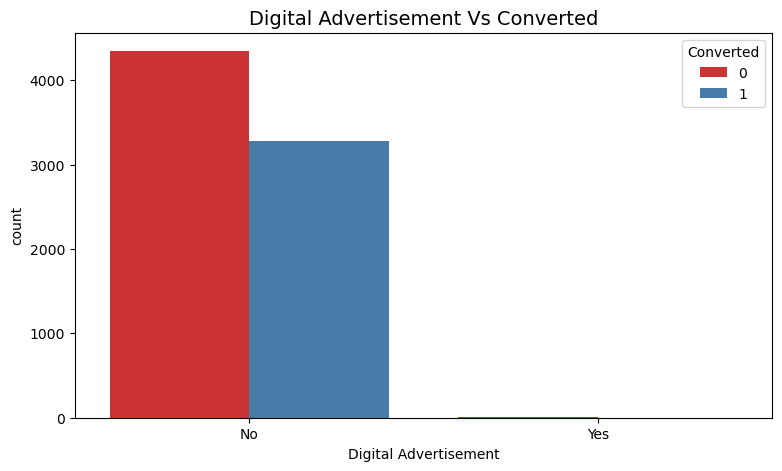

In [203]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Digital Advertisement", hue = "Converted", palette='Set1')
plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion. 

### Through Recommendations

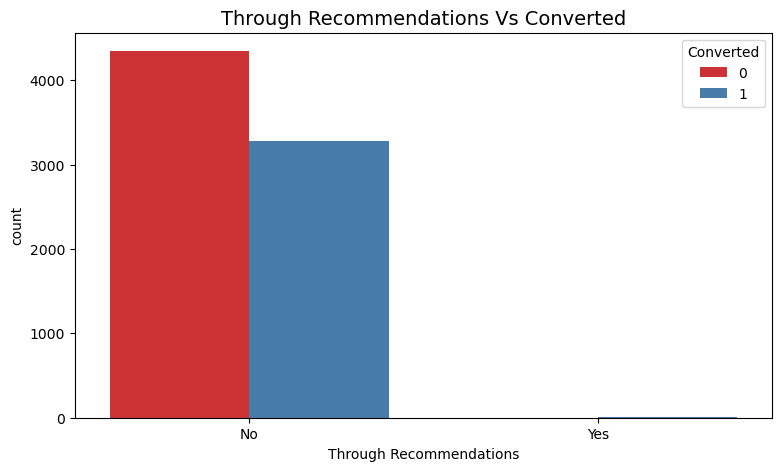

In [209]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Through Recommendations", hue = "Converted", palette='Set1')
plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion

### Receive More Updates About Our Courses

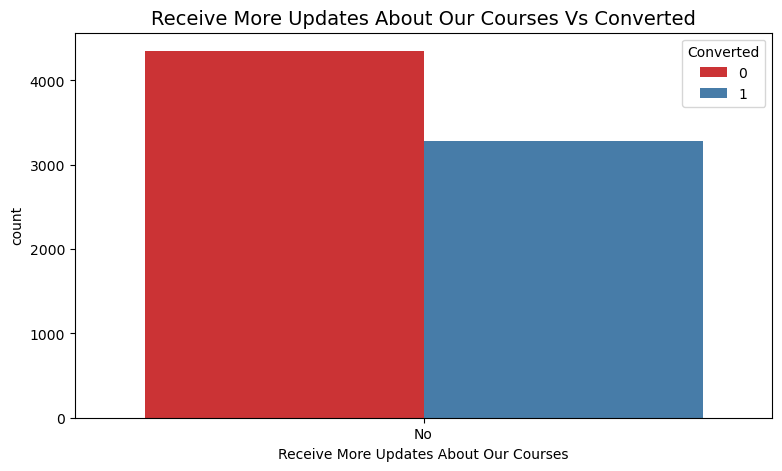

In [210]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Receive More Updates About Our Courses", hue = "Converted", palette='Set1')
plt.title('Receive More Updates About Our Courses Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion

###  Update me on Supply Chain Content 

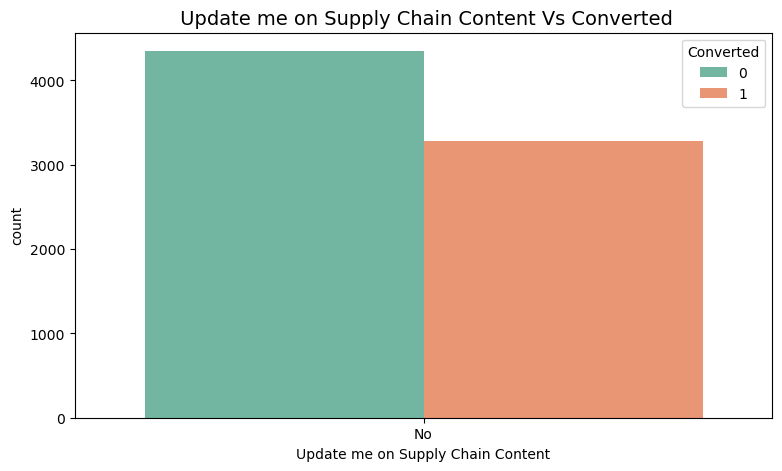

In [214]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Update me on Supply Chain Content", hue = "Converted", palette='Set2')
plt.title(' Update me on Supply Chain Content Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion

### Get updates on DM Content 

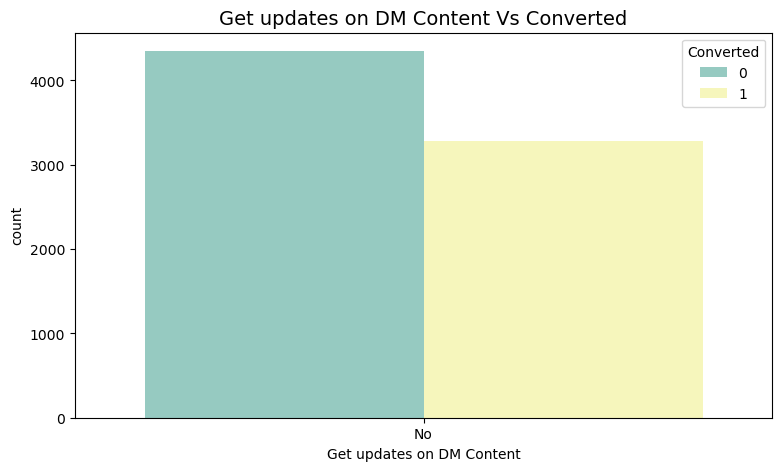

In [216]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Get updates on DM Content", hue = "Converted", palette='Set3')
plt.title('Get updates on DM Content Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion 

### City

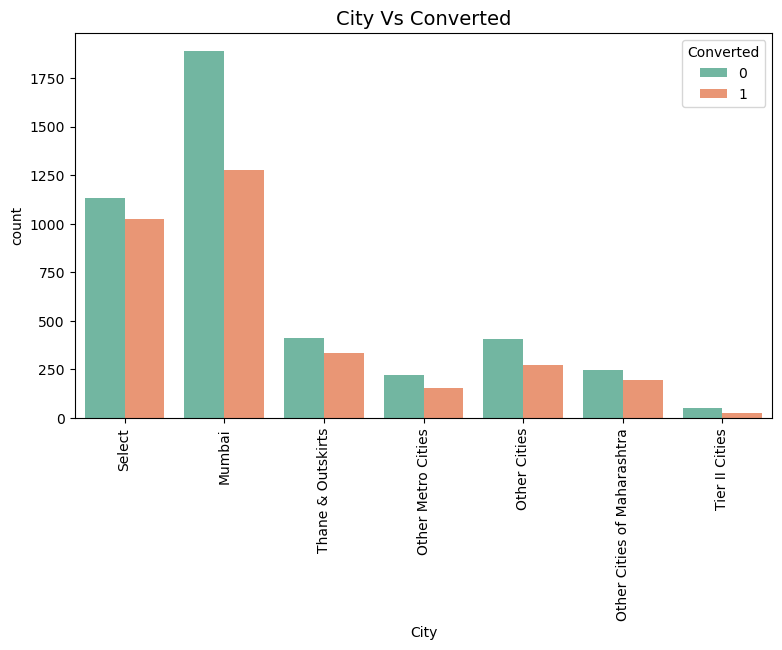

In [220]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "City", hue = "Converted", palette='Set2')
plt.xticks(rotation=90)
plt.title('City Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the leads are from Mumbai city with half of the conversion rates.

### I agree to pay the amount through cheque

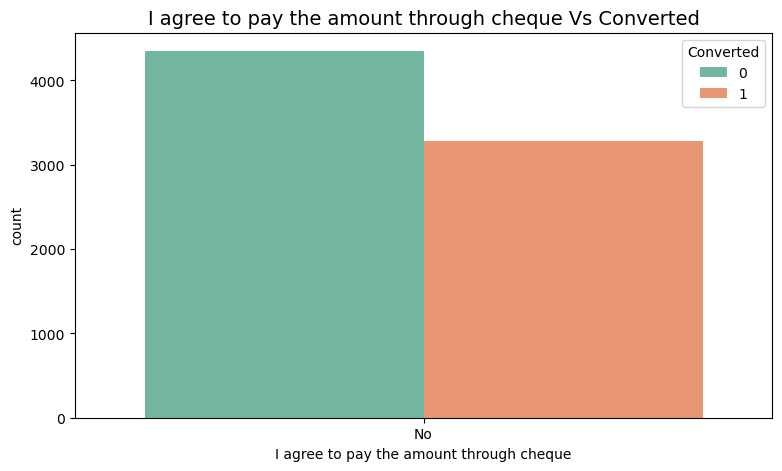

In [222]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "I agree to pay the amount through cheque", hue = "Converted", palette='Set2')
plt.title('I agree to pay the amount through cheque Vs Converted', fontsize = 14)
plt.show()

### Insights :

1. Most of the values are No and we can not conclude any result with conversion

### A free copy of Mastering The Interview

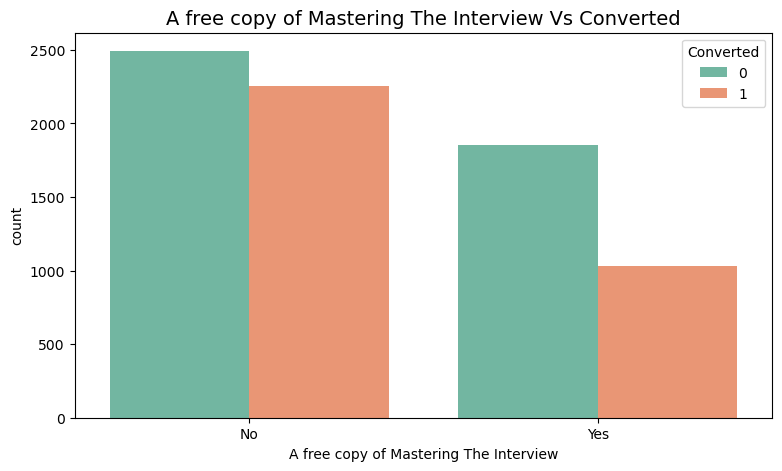

In [224]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "A free copy of Mastering The Interview", hue = "Converted", palette='Set2')
plt.title('A free copy of Mastering The Interview Vs Converted', fontsize = 14)
plt.show()

#### Insights :

1. Most of the values are No and we can not conclude any result with conversion

###  Last Notable Activity 

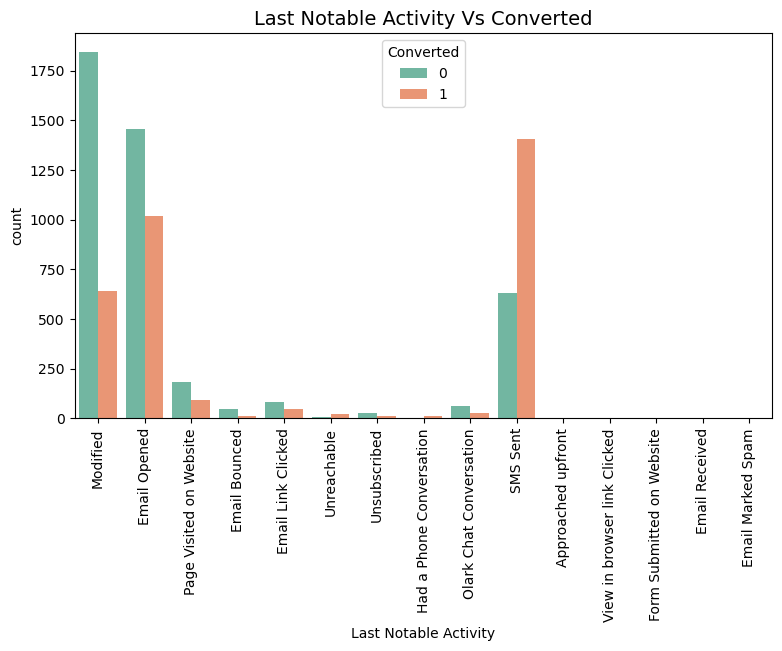

In [226]:
## Lets use countplot

plt.figure(figsize=(9,5))
sns.countplot(data = leads_data, x = "Last Notable Activity", hue = "Converted", palette='Set2')
plt.xticks(rotation=90)
plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.show()

### Final Outcome of the Univariate and Bivariate Analysis

#### We have seen multiple columns are not adding any Information to the model. Let's drop them

In [481]:
leads_data = leads_data.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [482]:
leads_data.shape

(7629, 14)

In [230]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7629 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      7629 non-null   object 
 1   Lead Origin                      7629 non-null   object 
 2   Lead Source                      7629 non-null   object 
 3   Do Not Email                     7629 non-null   object 
 4   Do Not Call                      7629 non-null   object 
 5   Converted                        7629 non-null   int64  
 6   TotalVisits                      7629 non-null   float64
 7   Total Time Spent on Website      7629 non-null   int64  
 8   Page Views Per Visit             7629 non-null   float64
 9   Last Activity                    7629 non-null   object 
 10  Specialization                   7629 non-null   object 
 11  What is your current occupation  7629 non-null   object 
 12  City                

## Step4: Data Preparation

In [234]:
# Check the data

leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


### Lets convert (yes/No) variable to 1/0

In [483]:
column = ['Do Not Email', 'Do Not Call']

def binary_convert(x):
    return x.map({'Yes': 1, "No": 0})

leads_data[column] = leads_data[column].apply(binary_convert)

In [301]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7629 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      7629 non-null   object 
 1   Lead Origin                      7629 non-null   object 
 2   Lead Source                      7629 non-null   object 
 3   Do Not Email                     7629 non-null   int64  
 4   Do Not Call                      7629 non-null   int64  
 5   Converted                        7629 non-null   int64  
 6   TotalVisits                      7629 non-null   float64
 7   Total Time Spent on Website      7629 non-null   int64  
 8   Page Views Per Visit             7629 non-null   float64
 9   Last Activity                    7629 non-null   object 
 10  Specialization                   7629 non-null   object 
 11  What is your current occupation  7629 non-null   object 
 12  City                

## Let's create Dummy variables for the categorical columns

In [484]:
Dummy_variable = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
Dummy_variable.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [485]:
## Let's merge the Dummy_variable with leads_data 

leads_data = pd.concat([leads_data, Dummy_variable], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


Data has been merged sucessfully. Now we can drop the categorical column which we used to create dummy variable

In [486]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [305]:
## Verify the column and records.

leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [306]:
leads_data.shape

(7629, 71)

## Step5: Split data into Train and Test  

In [487]:
# Import the library

from sklearn.model_selection import train_test_split

In [488]:
# Putting feature variable to X

X = leads_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [489]:
# Putting target variable to y

y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [490]:
# Let's split data into train(70%) and test(30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step6: Scaling the features 

In [491]:
# Create a scaler object using StandardScaler()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
661,0,0,-0.542231,1.750888,-0.28069,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7895,0,0,-0.542231,1.045861,-0.28069,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9108,0,0,0.190717,2.595470,0.86619,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
991,0,0,0.190717,0.094347,0.86619,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6659,0,0,0.190717,-0.761109,0.86619,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [492]:
# Let's check the Lead Conversion rate again

(sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100

43.00694717525232

#### Lets check the correlation 

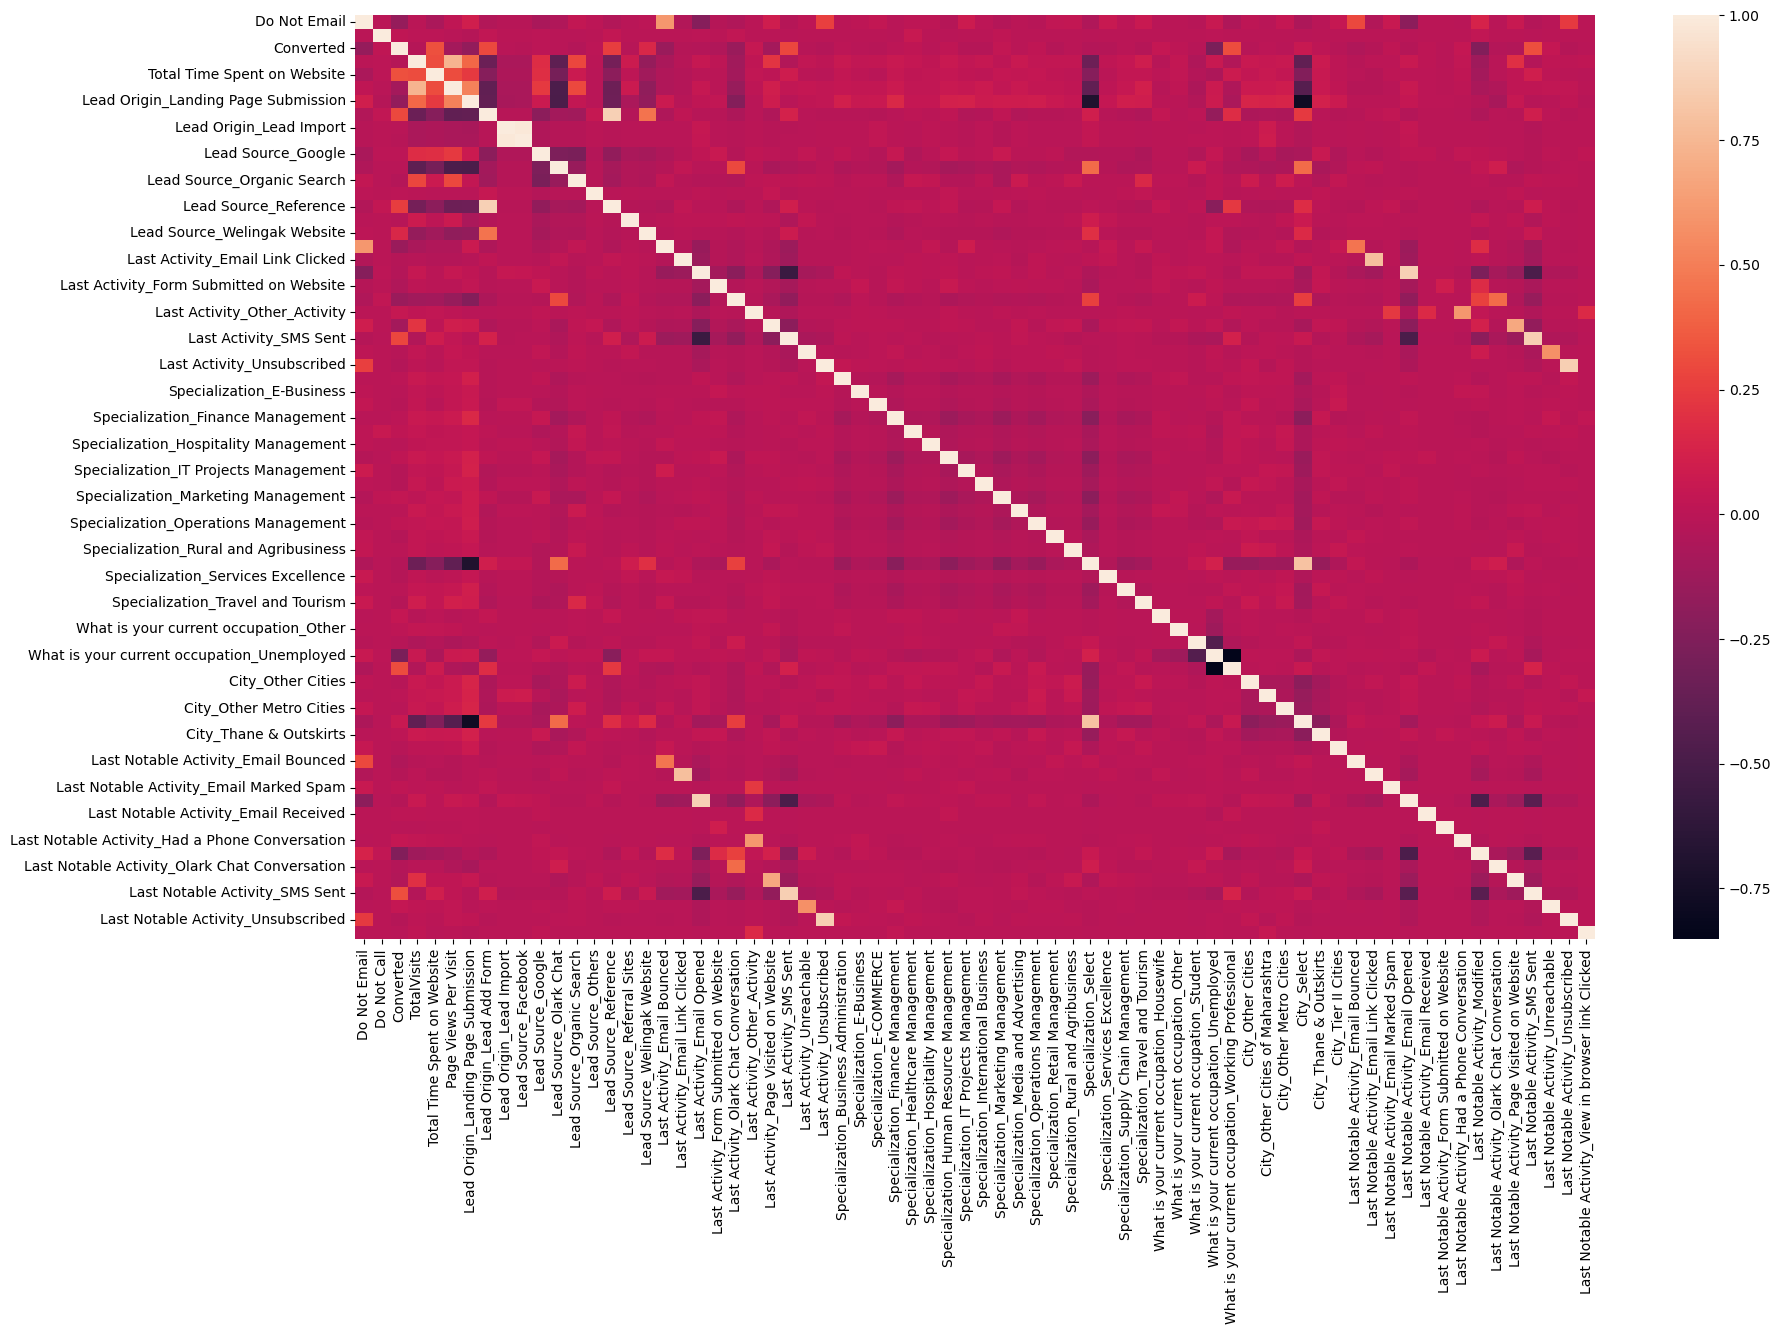

In [493]:
plt.figure(figsize = (20,12))
sns.heatmap(leads_data.corr())
plt.show()

## Step7: Feature selection using RFE

In [494]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [496]:
# Import RFE and select 20 variables

from sklearn.feature_selection import RFE

rfe = RFE(LR,step=20)
rfe = rfe.fit(X_train, y_train)

In [316]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False])

In [497]:
# Let'scheck which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity

In [498]:
# check columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_E-Business',
       'Specialization_Hospitality Management', 'Specialization_Select',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select',
       'Last Notable Activity_Email Bounced',
       '

## Model Building

##### Let's use StatsModel to Assess
####   Model - 1

In [499]:
import statsmodels.api as sm

In [500]:
#  Fit a logistic Regression model on X_train after adding a constant

X_train_sm = sm.add_constant(X_train[rfe_col])
lm_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lm_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5305
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2299.3
Date:                Mon, 20 Mar 2023   Deviance:                       4598.5
Time:                        00:21:05   Pearson chi2:                 5.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0888      0.729      1.494      0.135      -0.339       2.517
Do Not Email                                            -1.5205      0.238     -6.396      0.000      -1.986      -1.055
Do Not Call                                             21.3508   3.24e+04      0.001      0.999   -6.34e+04    6.34e+04
Total Time Spent on Website                              1.0894      0.043     25.620      0.000       1.006       1.173
Lead Origin_Landing Page Submission                     -1.2692      0.147     -8.645      0.000      -1.557      -0.981
Lead Origin_Lead Add Form                                1.3054      0.882      1.481      0.139      -0.423       3.033
Lead Origin_Lead Import                                  0.3033      0.495      0.612      0.540      -0.668       1.274
Lead Source_Olark Chat                                   1.2043      0.141      8.558      0.000       0.928       1.480
Lead Source_Reference                                    1.8192      0.905      2.009      0.045       0.044       3.594
Lead Source_Welingak Website                             4.6745      1.346      3.473      0.001       2.036       7.313
Last Activity_Email Bounced                             -0.7754      0.678     -1.144      0.252      -2.103       0.553
Last Activity_Email Link Clicked                         0.8505      0.399      2.133      0.033       0.069       1.632
Last Activity_Email Opened                               0.8108      0.189      4.280      0.000       0.440       1.182
Last Activity_Olark Chat Conversation                   -0.5549      0.248     -2.238      0.025      -1.041      -0.069
Last Activity_Other_Activity                             2.0609      0.647      3.184      0.001       0.792       3.329
Last Activity_SMS Sent                                   1.0248      0.199      5.160      0.000       0.636       1.414
Last Activity_Unsubscribed                               0.9261      0.645      1.436      0.151      -0.338       2.190
Specialization_E-Business                               -0.5865      0.468     -1.253      0.210      -1.504       0.331
Specialization_Hospitality Management                   -0.7483      0.346     -2.160      0.031      -1.427      -0.069
Specialization_Select                                   -0.5431      0.169     -3.213      0.001      -0.874      -0.212
Specialization_Services Excellence                      -0.7846      0.629     -1.247      0.212      -2.018       0.449
Specialization_Travel and Tourism                       -0.3398      0.243     -1.398      0.162      -0.816       0.136
What is your current occupation_Housewife               21

Since Pvalue of 'What is your current occupation_Housewife' and 'Do Not Call' is very high, we can drop this column.

In [502]:
# Dropping the column 'What is your current occupation_Housewife' and 'Do Not Call'
rfe_col_1 = rfe_col.drop(["What is your current occupation_Housewife", "Do Not Call"], 1)

#### Model - 2

In [503]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_1 = lm_2.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5307
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2302.3
Date:                Mon, 20 Mar 2023   Deviance:                       4604.7
Time:                        00:21:16   Pearson chi2:                 5.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6281      0.691      2.355      0.019       0.273       2.983
Do Not Email                                            -1.5293      0.238     -6.425      0.000      -1.996      -1.063
Total Time Spent on Website                              1.0882      0.042     25.613      0.000       1.005       1.171
Lead Origin_Landing Page Submission                     -1.2657      0.147     -8.636      0.000      -1.553      -0.978
Lead Origin_Lead Add Form                                1.3083      0.881      1.484      0.138      -0.419       3.036
Lead Origin_Lead Import                                  0.2998      0.495      0.605      0.545      -0.671       1.270
Lead Source_Olark Chat                                   1.2039      0.141      8.555      0.000       0.928       1.480
Lead Source_Reference                                    1.8378      0.905      2.030      0.042       0.064       3.612
Lead Source_Welingak Website                             4.6762      1.346      3.474      0.001       2.038       7.314
Last Activity_Email Bounced                             -0.7716      0.677     -1.139      0.255      -2.099       0.556
Last Activity_Email Link Clicked                         0.8448      0.399      2.119      0.034       0.064       1.626
Last Activity_Email Opened                               0.8081      0.189      4.274      0.000       0.438       1.179
Last Activity_Olark Chat Conversation                   -0.5536      0.247     -2.244      0.025      -1.037      -0.070
Last Activity_Other_Activity                             2.0577      0.647      3.180      0.001       0.789       3.326
Last Activity_SMS Sent                                   1.0186      0.198      5.134      0.000       0.630       1.407
Last Activity_Unsubscribed                               0.9320      0.644      1.446      0.148      -0.331       2.195
Specialization_E-Business                               -0.5883      0.468     -1.256      0.209      -1.506       0.330
Specialization_Hospitality Management                   -0.7489      0.346     -2.162      0.031      -1.428      -0.070
Specialization_Select                                   -0.5354      0.169     -3.168      0.002      -0.867      -0.204
Specialization_Services Excellence                      -0.7853      0.630     -1.247      0.212      -2.019       0.449
Specialization_Travel and Tourism                       -0.3406      0.243     -1.402      0.161      -0.817       0.135
What is your current occupation_Student                 -1.2570      0.590     -2.131      0.033      -2.413      -0.101
What is your current occupation_Unemployed              -1

Since Pvalue of 'Lead Source_Referral Sites' and 'Lead Origin_Lead Import' is very high, we can drop this column.

In [ ]:
rfe_col_1 = rfe_col_1.drop(['Lead Source_Referral Sites','Lead Origin_Lead Import'], 1)

### Model -3 

In [506]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_2 = lm_3.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5307
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2302.3
Date:                Mon, 20 Mar 2023   Deviance:                       4604.7
Time:                        00:21:40   Pearson chi2:                 5.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6281      0.691      2.355      0.019       0.273       2.983
Do Not Email                                            -1.5293      0.238     -6.425      0.000      -1.996      -1.063
Total Time Spent on Website                              1.0882      0.042     25.613      0.000       1.005       1.171
Lead Origin_Landing Page Submission                     -1.2657      0.147     -8.636      0.000      -1.553      -0.978
Lead Origin_Lead Add Form                                1.3083      0.881      1.484      0.138      -0.419       3.036
Lead Origin_Lead Import                                  0.2998      0.495      0.605      0.545      -0.671       1.270
Lead Source_Olark Chat                                   1.2039      0.141      8.555      0.000       0.928       1.480
Lead Source_Reference                                    1.8378      0.905      2.030      0.042       0.064       3.612
Lead Source_Welingak Website                             4.6762      1.346      3.474      0.001       2.038       7.314
Last Activity_Email Bounced                             -0.7716      0.677     -1.139      0.255      -2.099       0.556
Last Activity_Email Link Clicked                         0.8448      0.399      2.119      0.034       0.064       1.626
Last Activity_Email Opened                               0.8081      0.189      4.274      0.000       0.438       1.179
Last Activity_Olark Chat Conversation                   -0.5536      0.247     -2.244      0.025      -1.037      -0.070
Last Activity_Other_Activity                             2.0577      0.647      3.180      0.001       0.789       3.326
Last Activity_SMS Sent                                   1.0186      0.198      5.134      0.000       0.630       1.407
Last Activity_Unsubscribed                               0.9320      0.644      1.446      0.148      -0.331       2.195
Specialization_E-Business                               -0.5883      0.468     -1.256      0.209      -1.506       0.330
Specialization_Hospitality Management                   -0.7489      0.346     -2.162      0.031      -1.428      -0.070
Specialization_Select                                   -0.5354      0.169     -3.168      0.002      -0.867      -0.204
Specialization_Services Excellence                      -0.7853      0.630     -1.247      0.212      -2.019       0.449
Specialization_Travel and Tourism                       -0.3406      0.243     -1.402      0.161      -0.817       0.135
What is your current occupation_Student                 -1.2570      0.590     -2.131      0.033      -2.413      -0.101
What is your current occupation_Unemployed              -1

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' and 'Last Notable Activity_Email Bounced' and 'Last Activity_Email Bounced' is very high, we can drop this column. 

In [507]:
rfe_col_1 = rfe_col_1.drop(['Last Notable Activity_Had a Phone Conversation' , 'Last Notable Activity_Email Bounced', 'Last Activity_Email Bounced'], 1)

### Model -4

In [508]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_3 = lm_4.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5310
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2303.5
Date:                Mon, 20 Mar 2023   Deviance:                       4607.0
Time:                        00:21:56   Pearson chi2:                 5.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7532      0.650      2.697      0.007       0.479       3.027
Do Not Email                                            -1.6258      0.214     -7.585      0.000      -2.046      -1.206
Total Time Spent on Website                              1.0881      0.042     25.616      0.000       1.005       1.171
Lead Origin_Landing Page Submission                     -1.2701      0.146     -8.669      0.000      -1.557      -0.983
Lead Origin_Lead Add Form                                1.3061      0.881      1.483      0.138      -0.421       3.033
Lead Origin_Lead Import                                  0.2952      0.495      0.596      0.551      -0.675       1.266
Lead Source_Olark Chat                                   1.2018      0.141      8.540      0.000       0.926       1.478
Lead Source_Reference                                    1.8449      0.905      2.039      0.041       0.071       3.619
Lead Source_Welingak Website                             4.7039      1.346      3.494      0.000       2.065       7.343
Last Activity_Email Link Clicked                         0.8761      0.398      2.203      0.028       0.097       1.655
Last Activity_Email Opened                               0.8389      0.187      4.498      0.000       0.473       1.204
Last Activity_Olark Chat Conversation                   -0.5544      0.236     -2.352      0.019      -1.016      -0.092
Last Activity_Other_Activity                             2.3631      0.555      4.262      0.000       1.276       3.450
Last Activity_SMS Sent                                   1.0544      0.195      5.407      0.000       0.672       1.437
Last Activity_Unsubscribed                               0.9473      0.591      1.602      0.109      -0.211       2.106
Specialization_E-Business                               -0.5861      0.469     -1.250      0.211      -1.505       0.333
Specialization_Hospitality Management                   -0.7498      0.347     -2.163      0.031      -1.429      -0.070
Specialization_Select                                   -0.5383      0.169     -3.184      0.001      -0.870      -0.207
Specialization_Services Excellence                      -0.7872      0.629     -1.251      0.211      -2.020       0.446
Specialization_Travel and Tourism                       -0.3422      0.242     -1.413      0.158      -0.817       0.132
What is your current occupation_Student                 -1.2739      0.591     -2.157      0.031      -2.432      -0.116
What is your current occupation_Unemployed              -1.6278      0.547     -2.975      0.003      -2.700      -0.555
What is your current occupation_Working Professional     1

Since Pvalue of 'Lead Origin_Lead Add Form' and 'Specialization_E-Business' and 'Specialization_Services Excellence' and 'Specialization_Travel and Tourism' and 'Last Notable Activity_SMS Sent'  is very high, we can drop this column.

In [509]:
rfe_col_1 = rfe_col_1.drop([ 'Lead Origin_Lead Add Form', 'Specialization_E-Business', 'Specialization_Services Excellence', 'Specialization_Travel and Tourism', 'Last Notable Activity_SMS Sent' ], 1)

### Model -5

In [510]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_4 = lm_5.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5315
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2307.5
Date:                Mon, 20 Mar 2023   Deviance:                       4615.0
Time:                        00:22:03   Pearson chi2:                 5.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3941
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9705      0.585      3.367      0.001       0.824       3.117
Do Not Email                                            -1.6810      0.210     -8.001      0.000      -2.093      -1.269
Total Time Spent on Website                              1.0843      0.042     25.613      0.000       1.001       1.167
Lead Origin_Landing Page Submission                     -1.2971      0.146     -8.878      0.000      -1.583      -1.011
Lead Origin_Lead Import                                  0.2804      0.495      0.567      0.571      -0.690       1.250
Lead Source_Olark Chat                                   1.1957      0.140      8.521      0.000       0.921       1.471
Lead Source_Reference                                    3.1287      0.246     12.717      0.000       2.647       3.611
Lead Source_Welingak Website                             5.9902      1.023      5.854      0.000       3.985       7.996
Last Activity_Email Link Clicked                         0.8558      0.399      2.146      0.032       0.074       1.638
Last Activity_Email Opened                               0.8480      0.186      4.560      0.000       0.483       1.213
Last Activity_Olark Chat Conversation                   -0.6070      0.227     -2.671      0.008      -1.052      -0.162
Last Activity_Other_Activity                             2.3058      0.551      4.181      0.000       1.225       3.387
Last Activity_SMS Sent                                   1.0929      0.180      6.063      0.000       0.740       1.446
Last Activity_Unsubscribed                               0.8303      0.564      1.472      0.141      -0.275       1.936
Specialization_Hospitality Management                   -0.7323      0.347     -2.113      0.035      -1.412      -0.053
Specialization_Select                                   -0.5430      0.169     -3.212      0.001      -0.874      -0.212
What is your current occupation_Student                 -1.3067      0.591     -2.213      0.027      -2.464      -0.149
What is your current occupation_Unemployed              -1.6487      0.547     -3.013      0.003      -2.721      -0.576
What is your current occupation_Working Professional     1.1055      0.578      1.911      0.056      -0.028       2.239
City_Select                                             -0.5028      0.176     -2.857      0.004      -0.848      -0.158
Last Notable Activity_Email Link Clicked                -1.2556      0.480     -2.616      0.009      -2.197      -0.315
Last Notable Activity_Email Opened                      -1.0714      0.205     -5.234      0.000      -1.473      -0.670
Last Notable Activity_Modified                          -1

In [511]:
## Check VIF value

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col_1].values, i) for i in range(X_train[rfe_col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,28.58
20,Last Notable Activity_Email Opened,10.59
2,Lead Origin_Landing Page Submission,9.91
8,Last Activity_Email Opened,9.43
11,Last Activity_SMS Sent,6.20
18,City_Select,5.68
14,Specialization_Select,4.77
21,Last Notable Activity_Modified,4.50
17,What is your current occupation_Working Profes...,3.72
19,Last Notable Activity_Email Link Clicked,3.13


In [512]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
rfe_col_1 = rfe_col_1.drop('What is your current occupation_Unemployed')

### Model -6 

In [513]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_5 = lm_6.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5316
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2312.4
Date:                Mon, 20 Mar 2023   Deviance:                       4624.8
Time:                        00:22:12   Pearson chi2:                 5.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3506      0.231      1.519      0.129      -0.102       0.803
Do Not Email                                            -1.6721      0.210     -7.971      0.000      -2.083      -1.261
Total Time Spent on Website                              1.0843      0.042     25.638      0.000       1.001       1.167
Lead Origin_Landing Page Submission                     -1.3190      0.146     -9.037      0.000      -1.605      -1.033
Lead Origin_Lead Import                                  0.2689      0.495      0.543      0.587      -0.702       1.239
Lead Source_Olark Chat                                   1.1895      0.140      8.484      0.000       0.915       1.464
Lead Source_Reference                                    3.1287      0.246     12.731      0.000       2.647       3.610
Lead Source_Welingak Website                             5.9820      1.023      5.847      0.000       3.977       7.987
Last Activity_Email Link Clicked                         0.8421      0.399      2.111      0.035       0.060       1.624
Last Activity_Email Opened                               0.8385      0.186      4.514      0.000       0.474       1.203
Last Activity_Olark Chat Conversation                   -0.5935      0.227     -2.619      0.009      -1.038      -0.149
Last Activity_Other_Activity                             2.2944      0.551      4.161      0.000       1.214       3.375
Last Activity_SMS Sent                                   1.0853      0.180      6.031      0.000       0.733       1.438
Last Activity_Unsubscribed                               0.8139      0.564      1.443      0.149      -0.292       1.919
Specialization_Hospitality Management                   -0.7421      0.347     -2.141      0.032      -1.422      -0.063
Specialization_Select                                   -0.5794      0.169     -3.437      0.001      -0.910      -0.249
What is your current occupation_Student                  0.3303      0.231      1.432      0.152      -0.122       0.782
What is your current occupation_Working Professional     2.7403      0.200     13.684      0.000       2.348       3.133
City_Select                                             -0.4912      0.176     -2.795      0.005      -0.836      -0.147
Last Notable Activity_Email Link Clicked                -1.2441      0.480     -2.593      0.010      -2.184      -0.304
Last Notable Activity_Email Opened                      -1.0558      0.204     -5.168      0.000      -1.456      -0.655
Last Notable Activity_Modified                          -1.1636      0.143     -8.139      0.000      -1.444      -0.883
Last Notable Activity_Page Visited on Website           -0

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [514]:
rfe_col_1 = rfe_col_1.drop('What is your current occupation_Student')

### Model -7 

In [515]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_6 = lm_7.fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5317
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2313.4
Date:                Mon, 20 Mar 2023   Deviance:                       4626.8
Time:                        00:22:20   Pearson chi2:                 5.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3928
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3615      0.231      1.567      0.117      -0.091       0.814
Do Not Email                                            -1.6728      0.210     -7.969      0.000      -2.084      -1.261
Total Time Spent on Website                              1.0839      0.042     25.638      0.000       1.001       1.167
Lead Origin_Landing Page Submission                     -1.3197      0.146     -9.048      0.000      -1.606      -1.034
Lead Origin_Lead Import                                  0.2610      0.495      0.527      0.598      -0.709       1.231
Lead Source_Olark Chat                                   1.1988      0.140      8.559      0.000       0.924       1.473
Lead Source_Reference                                    3.1342      0.246     12.758      0.000       2.653       3.616
Lead Source_Welingak Website                             5.9780      1.023      5.843      0.000       3.973       7.983
Last Activity_Email Link Clicked                         0.8389      0.398      2.106      0.035       0.058       1.620
Last Activity_Email Opened                               0.8426      0.186      4.534      0.000       0.478       1.207
Last Activity_Olark Chat Conversation                   -0.5814      0.226     -2.567      0.010      -1.025      -0.138
Last Activity_Other_Activity                             2.2866      0.551      4.146      0.000       1.206       3.368
Last Activity_SMS Sent                                   1.0789      0.180      5.995      0.000       0.726       1.432
Last Activity_Unsubscribed                               0.8038      0.564      1.424      0.154      -0.302       1.910
Specialization_Hospitality Management                   -0.7320      0.347     -2.109      0.035      -1.412      -0.052
Specialization_Select                                   -0.5810      0.169     -3.443      0.001      -0.912      -0.250
What is your current occupation_Working Professional     2.7312      0.200     13.648      0.000       2.339       3.123
City_Select                                             -0.4905      0.176     -2.791      0.005      -0.835      -0.146
Last Notable Activity_Email Link Clicked                -1.2435      0.479     -2.595      0.009      -2.182      -0.304
Last Notable Activity_Email Opened                      -1.0599      0.204     -5.188      0.000      -1.460      -0.659
Last Notable Activity_Modified                          -1.1688      0.143     -8.178      0.000      -1.449      -0.889
Last Notable Activity_Page Visited on Website           -0.4079      0.277     -1.471      0.141      -0.951       0.136
Last Notable Activity_Unreachable                        1

Since Pvalue of 'Last Activity_Unsubscribed' is very high, we can drop this column.

In [516]:
rfe_col_1 = rfe_col_1.drop('Last Activity_Unsubscribed')

#### Checking for VIF value 

In [517]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col_1].values, i) for i in range(X_train[rfe_col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_Email Opened,9.04
8,Last Activity_Email Opened,8.77
2,Lead Origin_Landing Page Submission,6.33
15,City_Select,5.33
13,Specialization_Select,4.56
11,Last Activity_SMS Sent,3.41
7,Last Activity_Email Link Clicked,3.07
16,Last Notable Activity_Email Link Clicked,3.06
18,Last Notable Activity_Modified,2.93
4,Lead Source_Olark Chat,1.83


In [518]:
# Dropping the column  'Last Notable Activity_Email Opened' and 'Last Activity_Email Opened'  to reduce the variables
rfe_col_1 = rfe_col_1.drop(['Last Notable Activity_Email Opened', 'Last Activity_Email Opened'], 1)

### Model -8

In [519]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_7 = lm_8.fit()
result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5320
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2330.4
Date:                Mon, 20 Mar 2023   Deviance:                       4660.7
Time:                        00:22:31   Pearson chi2:                 5.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2093      0.145      1.447      0.148      -0.074       0.493
Do Not Email                                            -1.6152      0.192     -8.433      0.000      -1.991      -1.240
Total Time Spent on Website                              1.0856      0.042     25.796      0.000       1.003       1.168
Lead Origin_Landing Page Submission                     -1.3211      0.146     -9.065      0.000      -1.607      -1.035
Lead Origin_Lead Import                                  0.2523      0.498      0.507      0.612      -0.723       1.228
Lead Source_Olark Chat                                   1.2306      0.140      8.784      0.000       0.956       1.505
Lead Source_Reference                                    3.1568      0.245     12.891      0.000       2.677       3.637
Lead Source_Welingak Website                             5.9298      1.021      5.808      0.000       3.929       7.931
Last Activity_Email Link Clicked                         0.6053      0.385      1.571      0.116      -0.150       1.360
Last Activity_Olark Chat Conversation                   -0.7298      0.192     -3.793      0.000      -1.107      -0.353
Last Activity_Other_Activity                             2.1831      0.533      4.098      0.000       1.139       3.227
Last Activity_SMS Sent                                   1.1531      0.081     14.260      0.000       0.995       1.312
Specialization_Hospitality Management                   -0.7302      0.342     -2.133      0.033      -1.401      -0.059
Specialization_Select                                   -0.5625      0.169     -3.333      0.001      -0.893      -0.232
What is your current occupation_Working Professional     2.7256      0.199     13.668      0.000       2.335       3.117
City_Select                                             -0.5007      0.176     -2.848      0.004      -0.845      -0.156
Last Notable Activity_Email Link Clicked                -0.8661      0.466     -1.860      0.063      -1.779       0.047
Last Notable Activity_Modified                          -0.7930      0.088     -8.992      0.000      -0.966      -0.620
Last Notable Activity_Page Visited on Website           -0.2619      0.213     -1.228      0.220      -0.680       0.156
Last Notable Activity_Unreachable                        1.8522      0.686      2.702      0.007       0.509       3.196
========================================================================================================================
"""

Since Pvalue of 'Last Activity_Email Link Clicked' is very high, we can drop this column.

In [520]:
rfe_col_1 = rfe_col_1.drop( 'Last Activity_Email Link Clicked' )

#### Checking for VIF value 

In [521]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col_1].values, i) for i in range(X_train[rfe_col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,City_Select,4.93
11,Specialization_Select,4.37
2,Lead Origin_Landing Page Submission,1.99
9,Last Activity_SMS Sent,1.70
15,Last Notable Activity_Modified,1.70
4,Lead Source_Olark Chat,1.63
7,Last Activity_Olark Chat Conversation,1.33
5,Lead Source_Reference,1.30
12,What is your current occupation_Working Profes...,1.26
1,Total Time Spent on Website,1.22


In [522]:
# Dropping the column  'City_Select' and 'Specialization_Select'  to reduce the variables
rfe_col_1 = rfe_col_1.drop(['City_Select', 'Specialization_Select'], 1)

### Model -9

In [523]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_8 = lm_9.fit()
result_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5323
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2357.2
Date:                Mon, 20 Mar 2023   Deviance:                       4714.5
Time:                        00:22:42   Pearson chi2:                 5.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3827
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5347      0.096     -5.542      0.000      -0.724      -0.346
Do Not Email                                            -1.6312      0.190     -8.587      0.000      -2.004      -1.259
Total Time Spent on Website                              1.1050      0.042     26.421      0.000       1.023       1.187
Lead Origin_Landing Page Submission                     -0.5812      0.098     -5.949      0.000      -0.773      -0.390
Lead Origin_Lead Import                                  0.7025      0.480      1.464      0.143      -0.238       1.643
Lead Source_Olark Chat                                   1.1957      0.136      8.770      0.000       0.928       1.463
Lead Source_Reference                                    3.4579      0.241     14.365      0.000       2.986       3.930
Lead Source_Welingak Website                             5.7621      1.019      5.655      0.000       3.765       7.759
Last Activity_Olark Chat Conversation                   -0.8493      0.187     -4.533      0.000      -1.217      -0.482
Last Activity_Other_Activity                             2.1168      0.530      3.994      0.000       1.078       3.156
Last Activity_SMS Sent                                   1.1030      0.080     13.800      0.000       0.946       1.260
Specialization_Hospitality Management                   -0.6221      0.337     -1.847      0.065      -1.282       0.038
What is your current occupation_Working Professional     2.8061      0.197     14.211      0.000       2.419       3.193
Last Notable Activity_Email Link Clicked                -0.3011      0.263     -1.145      0.252      -0.817       0.214
Last Notable Activity_Modified                          -0.7733      0.086     -8.965      0.000      -0.942      -0.604
Last Notable Activity_Page Visited on Website           -0.2520      0.212     -1.191      0.234      -0.667       0.163
Last Notable Activity_Unreachable                        1.9209      0.671      2.863      0.004       0.606       3.236
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Email Link Clicked' is very high, we can drop this column.

In [524]:
rfe_col_1 = rfe_col_1.drop('Last Notable Activity_Email Link Clicked')

#### Checking for VIF value

In [525]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col_1].values, i) for i in range(X_train[rfe_col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.81
12,Last Notable Activity_Modified,1.58
9,Last Activity_SMS Sent,1.52
4,Lead Source_Olark Chat,1.34
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Reference,1.23
1,Total Time Spent on Website,1.22
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.14
13,Last Notable Activity_Page Visited on Website,1.06


In [526]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
rfe_col_1 = rfe_col_1.drop('Last Notable Activity_Unreachable')

### Model -10

In [528]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_9 = lm_10.fit()
result_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5325
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.7
Date:                Mon, 20 Mar 2023   Deviance:                       4725.5
Time:                        00:22:55   Pearson chi2:                 5.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5328      0.096     -5.572      0.000      -0.720      -0.345
Do Not Email                                            -1.6279      0.190     -8.568      0.000      -2.000      -1.256
Total Time Spent on Website                              1.1031      0.042     26.422      0.000       1.021       1.185
Lead Origin_Landing Page Submission                     -0.5796      0.098     -5.943      0.000      -0.771      -0.388
Lead Origin_Lead Import                                  0.6993      0.480      1.457      0.145      -0.241       1.640
Lead Source_Olark Chat                                   1.1858      0.136      8.718      0.000       0.919       1.452
Lead Source_Reference                                    3.4527      0.241     14.353      0.000       2.981       3.924
Lead Source_Welingak Website                             5.7586      1.019      5.652      0.000       3.762       7.756
Last Activity_Olark Chat Conversation                   -0.8459      0.187     -4.518      0.000      -1.213      -0.479
Last Activity_Other_Activity                             2.1154      0.530      3.993      0.000       1.077       3.154
Last Activity_SMS Sent                                   1.1013      0.079     13.922      0.000       0.946       1.256
Specialization_Hospitality Management                   -0.6261      0.336     -1.861      0.063      -1.285       0.033
What is your current occupation_Working Professional     2.8156      0.197     14.270      0.000       2.429       3.202
Last Notable Activity_Modified                          -0.7745      0.086     -9.033      0.000      -0.943      -0.606
Last Notable Activity_Page Visited on Website           -0.2541      0.211     -1.204      0.229      -0.668       0.160
========================================================================================================================
"""

In [361]:
# Dropping the column  'Specialization_Hospitality Management' to reduce the variables
rfe_col_1 = rfe_col_1.drop('Specialization_Hospitality Management')

#### Checking for VIF value

In [529]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col_1].values, i) for i in range(X_train[rfe_col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.80
12,Last Notable Activity_Modified,1.58
9,Last Activity_SMS Sent,1.52
4,Lead Source_Olark Chat,1.34
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Reference,1.23
1,Total Time Spent on Website,1.22
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.14
13,Last Notable Activity_Page Visited on Website,1.06


### Model -11 

In [530]:
X_train_sm = sm.add_constant(X_train[rfe_col_1])
lm_11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_10 = lm_11.fit()
result_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5325
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.7
Date:                Mon, 20 Mar 2023   Deviance:                       4725.5
Time:                        00:22:59   Pearson chi2:                 5.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5328      0.096     -5.572      0.000      -0.720      -0.345
Do Not Email                                            -1.6279      0.190     -8.568      0.000      -2.000      -1.256
Total Time Spent on Website                              1.1031      0.042     26.422      0.000       1.021       1.185
Lead Origin_Landing Page Submission                     -0.5796      0.098     -5.943      0.000      -0.771      -0.388
Lead Origin_Lead Import                                  0.6993      0.480      1.457      0.145      -0.241       1.640
Lead Source_Olark Chat                                   1.1858      0.136      8.718      0.000       0.919       1.452
Lead Source_Reference                                    3.4527      0.241     14.353      0.000       2.981       3.924
Lead Source_Welingak Website                             5.7586      1.019      5.652      0.000       3.762       7.756
Last Activity_Olark Chat Conversation                   -0.8459      0.187     -4.518      0.000      -1.213      -0.479
Last Activity_Other_Activity                             2.1154      0.530      3.993      0.000       1.077       3.154
Last Activity_SMS Sent                                   1.1013      0.079     13.922      0.000       0.946       1.256
Specialization_Hospitality Management                   -0.6261      0.336     -1.861      0.063      -1.285       0.033
What is your current occupation_Working Professional     2.8156      0.197     14.270      0.000       2.429       3.202
Last Notable Activity_Modified                          -0.7745      0.086     -9.033      0.000      -0.943      -0.606
Last Notable Activity_Page Visited on Website           -0.2541      0.211     -1.204      0.229      -0.668       0.160
========================================================================================================================
"""

#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-11 is our final model. We have 11 variables in our final model.

### Making Prediction on the Train set 

In [531]:
# Lets predict the values on the train set

y_train_pred = result_10.predict(X_train_sm)
y_train_pred[:10]

661     0.694024
7895    0.324480
9108    0.945423
991     0.394430
6659    0.124332
8829    0.054448
8164    0.311217
4885    0.786935
5509    0.845849
8152    0.015149
dtype: float64

In [532]:
# Lets reshape into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69402433, 0.32447989, 0.94542258, 0.39442951, 0.12433162,
       0.05444805, 0.31121663, 0.78693513, 0.84584943, 0.01514909])

In [533]:
# Create a dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.694024,661
1,1,0.324480,7895
2,0,0.945423,9108
3,0,0.394430,991
4,0,0.124332,6659


### Let's choose an arbitrary cut-off probability point of 0.5 to find the predicted labels

I am Creating a new column 'pred_value' with 1 if Conversion_Prob > 0.5 else 0

In [534]:
y_train_pred_final['pred_value'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Prospect ID,pred_value
0,1,0.694024,661,1
1,1,0.324480,7895,0
2,0,0.945423,9108,1
3,0,0.394430,991,0
4,0,0.124332,6659,0


### Making the Confusion matrix 

In [535]:
# Import the Library
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.pred_value )
print(confusion)

[[2633  423]
 [ 676 1608]]


In [378]:
# The confusion matrix indicates as below

# Predicted     not_converted    converted
# Actual
# not_converted        2637      419
# converted            674       1610  

In [536]:
# Let's check the overall accuracy.

print('Accuracy :- ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_value))

Accuracy :-  0.7941947565543072


Accuracy rate is around 80% which is very good.

### Metrics -

#####  Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [537]:
TP = confusion[1,1]  # true positive   
TN = confusion[0,0]  # true negatives
FP = confusion[0,1]  # false positives
FN = confusion[1,0]  # false negatives

In [538]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :- ",TP / float(TP+FN))

Sensitivity :-  0.7040280210157618


In [539]:
# Let's see the Specificity of our logistic regression model

print("Specificity :- ",TN / float(TN+FP))

Specificity :-  0.8615837696335078


In [540]:
# Calculate false postive rate

print("False Positive Rate :-",FP/ float(TN+FP))

False Positive Rate :- 0.13841623036649214


In [541]:
# Let's find positive predictive value 

print("Positive Predictive Value :-",TP / float(TP+FP))

Positive Predictive Value :- 0.7917282127031019


In [542]:
# Let's find Negative predictive value

print ("Negative predictive value :-",TN / float(TN+ FN))

Negative predictive value :- 0.795708673315201


#### Insights :

1. We got Sensitivity of 70% and that is because our cut-off point was 0.5. We need to optimize the cut-off point to get a good Sensitivity value.

2. We got Specificity of 86% which is very good.

## Step8:  Plotting the ROC Curve


In [543]:
def roc_plot( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [544]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

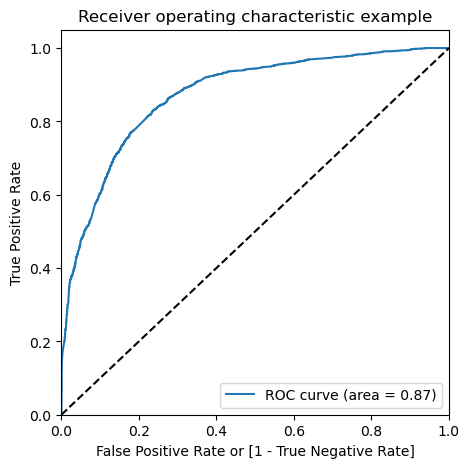

In [545]:
roc_plot(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is Very good.It means we  have a good model.

## Step9: Let's Find the Optimal Cutoff Point

In [546]:
# Let's create columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,pred_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.694024,661,1,1,1,1,1,1,1,1,0,0,0
1,1,0.324480,7895,0,1,1,1,1,0,0,0,0,0,0
2,0,0.945423,9108,1,1,1,1,1,1,1,1,1,1,1
3,0,0.394430,991,0,1,1,1,1,0,0,0,0,0,0
4,0,0.124332,6659,0,1,1,0,0,0,0,0,0,0,0


In [547]:
# Now let's try different cut-off points

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cutoff = pd.DataFrame( columns = ['prob','accuracy','Sensitivity','Specificity'])

value = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in value:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy  Sensitivity  Specificity
0.0   0.0  0.427715     1.000000     0.000000
0.1   0.1  0.556742     0.981611     0.239202
0.2   0.2  0.731835     0.932574     0.581806
0.3   0.3  0.778090     0.874781     0.705825
0.4   0.4  0.797566     0.776708     0.813154
0.5   0.5  0.794195     0.704028     0.861584
0.6   0.6  0.779026     0.628284     0.891688
0.7   0.7  0.753933     0.513135     0.933901
0.8   0.8  0.726779     0.408056     0.964987
0.9   0.9  0.675655     0.259194     0.986911


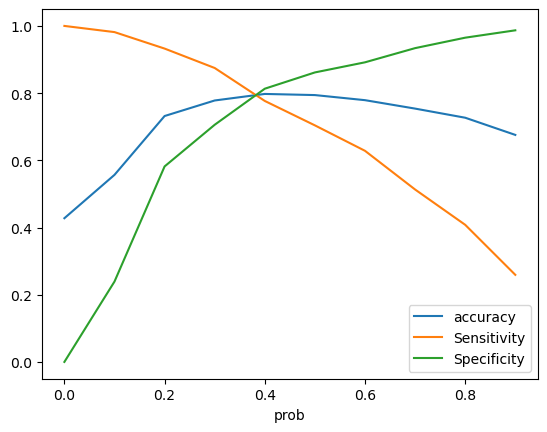

In [548]:
# Now Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff.plot.line(x='prob', y=['accuracy','Sensitivity','Specificity'])
plt.show()

We can take the optimum cutoff point is 0.36 from above curve.

In [549]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,pred_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.694024,661,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.324480,7895,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.945423,9108,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.394430,991,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.124332,6659,0,1,1,0,0,0,0,0,0,0,0,0


### Assigning Lead Score to the Training data

In [589]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head(20)

,Converted,Conversion_Prob,Prospect ID,pred_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.694024,661,1,1,1,1,1,1,1,1,0,0,0,1,69
1,1,0.324480,7895,0,1,1,1,1,0,0,0,0,0,0,0,32
2,0,0.945423,9108,1,1,1,1,1,1,1,1,1,1,1,1,95
3,0,0.394430,991,0,1,1,1,1,0,0,0,0,0,0,1,39
4,0,0.124332,6659,0,1,1,0,0,0,0,0,0,0,0,0,12
5,0,0.054448,8829,0,1,0,0,0,0,0,0,0,0,0,0,5
6,1,0.311217,8164,0,1,1,1,1,0,0,0,0,0,0,0,31
7,1,0.786935,4885,1,1,1,1,1,1,1,1,1,0,0,1,79
8,1,0.845849,5509,1,1,1,1,1,1,1,1,1,1,0,1,85
9,0,0.015149,8152,0,1,0,0,0,0,0,0,0,0,0,0,2


### Model Evaluation

In [551]:
# Let's check the overall accuracy.

print("Accuracy :-",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy :- 0.7891385767790262


In [552]:
# Confusion matrix

confusion_1= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_1

array([[2304,  752],
       [ 374, 1910]], dtype=int64)

In [553]:
TP = confusion_1[1,1] # true positive 
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

In [554]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :- ",TP / float(TP+FN))

Sensitivity :-  0.8362521891418564


In [555]:
# Let us calculate specificity of our logistic regression model
print("Specificity :-",TN / float(TN+FP))

Specificity :- 0.7539267015706806


In [556]:
# Calculate false postive rate.
print("False Positive rate :- ",FP/ float(TN+FP))

False Positive rate :-  0.24607329842931938


In [418]:
# Positive predictive value 
print("Positive Predictive Value :- ",TP / float(TP+FP))

Positive Predictive Value :-  0.718362748779572


In [419]:
# Negative predictive value
print("Negative Predictive Value :- ",TN / float(TN+ FN))

Negative Predictive Value :-  0.8614120283899888


## Step10: Precision and Recall

In [557]:
#  Lets check the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_value )
confusion

array([[2633,  423],
       [ 676, 1608]], dtype=int64)

In [558]:
# Precision

print("Precision :- ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :-  0.7917282127031019


In [559]:
# Recall

print("Recall :-",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall :- 0.7040280210157618


## Precision and recall tradeoff 

In [560]:
#Import library

from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.pred_value

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 5335    0
 5336    1
 5337    0
 5338    1
 5339    1
 Name: Converted, Length: 5340, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 5335    0
 5336    1
 5337    0
 5338    1
 5339    1
 Name: pred_value, Length: 5340, dtype: int64)

In [561]:
pre, rec, threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

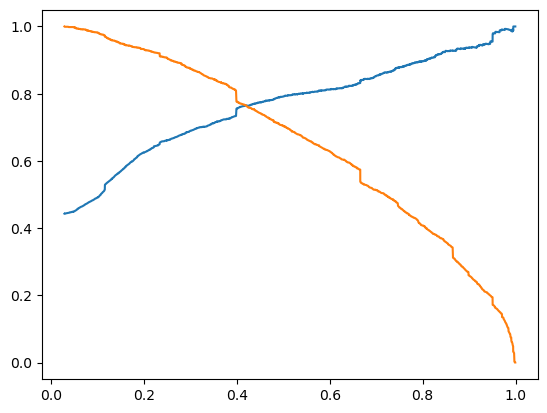

In [562]:
# Let's plot a trade-off curve between precision and recall

plt.plot(threshold, pre[:-1])
plt.plot(threshold, rec[:-1])
plt.show()

## Step11: Making predictions on the test set

In [563]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [564]:
X_test = X_test[rfe_col_1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
747,0,-0.449375,1,0,0,0,0,0,0,0,0,0,0,1
3589,0,1.743638,1,0,0,0,0,0,0,0,0,0,0,1
5112,1,0.021851,1,0,0,0,0,0,0,0,0,0,0,1
6492,0,-0.965911,0,0,1,0,0,0,0,0,0,0,0,0
5746,0,0.409706,1,0,0,0,0,0,0,0,0,0,0,1


In [566]:
# Adding a constant

X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set

y_test_pred = result_10.predict(X_test_sm)
y_test_pred[:10]

747     0.134441
3589    0.635738
5112    0.048784
6492    0.398315
5746    0.286064
413     0.206130
583     0.112949
643     0.233792
3872    0.122515
5615    0.103219
dtype: float64

In [568]:
# Converting y_test_pred to a dataframe which is an array

y_pred_array = pd.DataFrame(y_test_pred)
y_pred_array.head()

,0
747,0.134441
3589,0.635738
5112,0.048784
6492,0.398315
5746,0.286064


In [570]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [571]:
# Remove index for both dataframes to append them side by side 

y_pred_array.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [572]:
# concat both dataframes

y_pred_final = pd.concat([y_test_df, y_pred_array],axis=1)

In [573]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,747,0.134441
1,1,3589,0.635738
2,0,5112,0.048784
3,0,6492,0.398315
4,1,5746,0.286064


In [574]:
# Rename the 0 column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [576]:
# Re-index the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,747,1,0.134441
1,3589,1,0.635738
2,5112,0,0.048784
3,6492,0,0.398315
4,5746,1,0.286064


In [577]:
# Lets apply the cutoff value 0.36

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

In [578]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,747,1,0.134441,0
1,3589,1,0.635738,1
2,5112,0,0.048784,0
3,6492,0,0.398315,1
4,5746,1,0.286064,0


In [579]:
# Let's check the overall accuracy.

print("Accuracy :-",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy :- 0.7889908256880734


In [580]:
# Making the confusion matrix

confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_2

array([[973, 319],
       [164, 833]], dtype=int64)

In [582]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [583]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :-",TP / float(TP+FN))

Sensitivity :- 0.835506519558676


In [584]:
# Let us calculate specificity

print("Specificity :-",TN / float(TN+FP))

Specificity :- 0.7530959752321982


## Assign Lead Score to the Testing data

In [585]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,747,1,0.134441,0,13
1,3589,1,0.635738,1,64
2,5112,0,0.048784,0,5
3,6492,0,0.398315,1,40
4,5746,1,0.286064,0,29


### Insights Of the Test Data :-

1. Accuracy : 78.9 %
2. Sensitivity : 83.5%
3. Specificity : 75.3 %


### Results :

###  Comparing the values for Train & Test:


#### Train Data: 

1. Accuracy : 79.4 %
2. Sensitivity : 70.5%
3. Specificity : 86.1%


#### Test  Data: 

1. Accuracy : 78.9 %
2. Sensitivity : 83.5%
3. Specificity : 75.3 %


**we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well.

### Lets findout which customer should be more focused/contacted based on the Lead_score>80

In [587]:
Big_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
Big_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
12,7117,1,0.841898,1,84
14,7007,0,0.806469,1,81
16,1311,1,0.862024,1,86
22,1103,1,0.852757,1,85
49,6064,0,0.797497,1,80
...,...,...,...,...,...
2238,7570,1,0.922638,1,92
2252,7496,1,0.991690,1,99
2268,3194,1,0.864643,1,86
2280,8082,1,0.990715,1,99


### There are 471 leads which can be contacted and have a high chance of getting converted.